# AIDI 1000: AI Algorithms and Mathematics – Assignment - 3

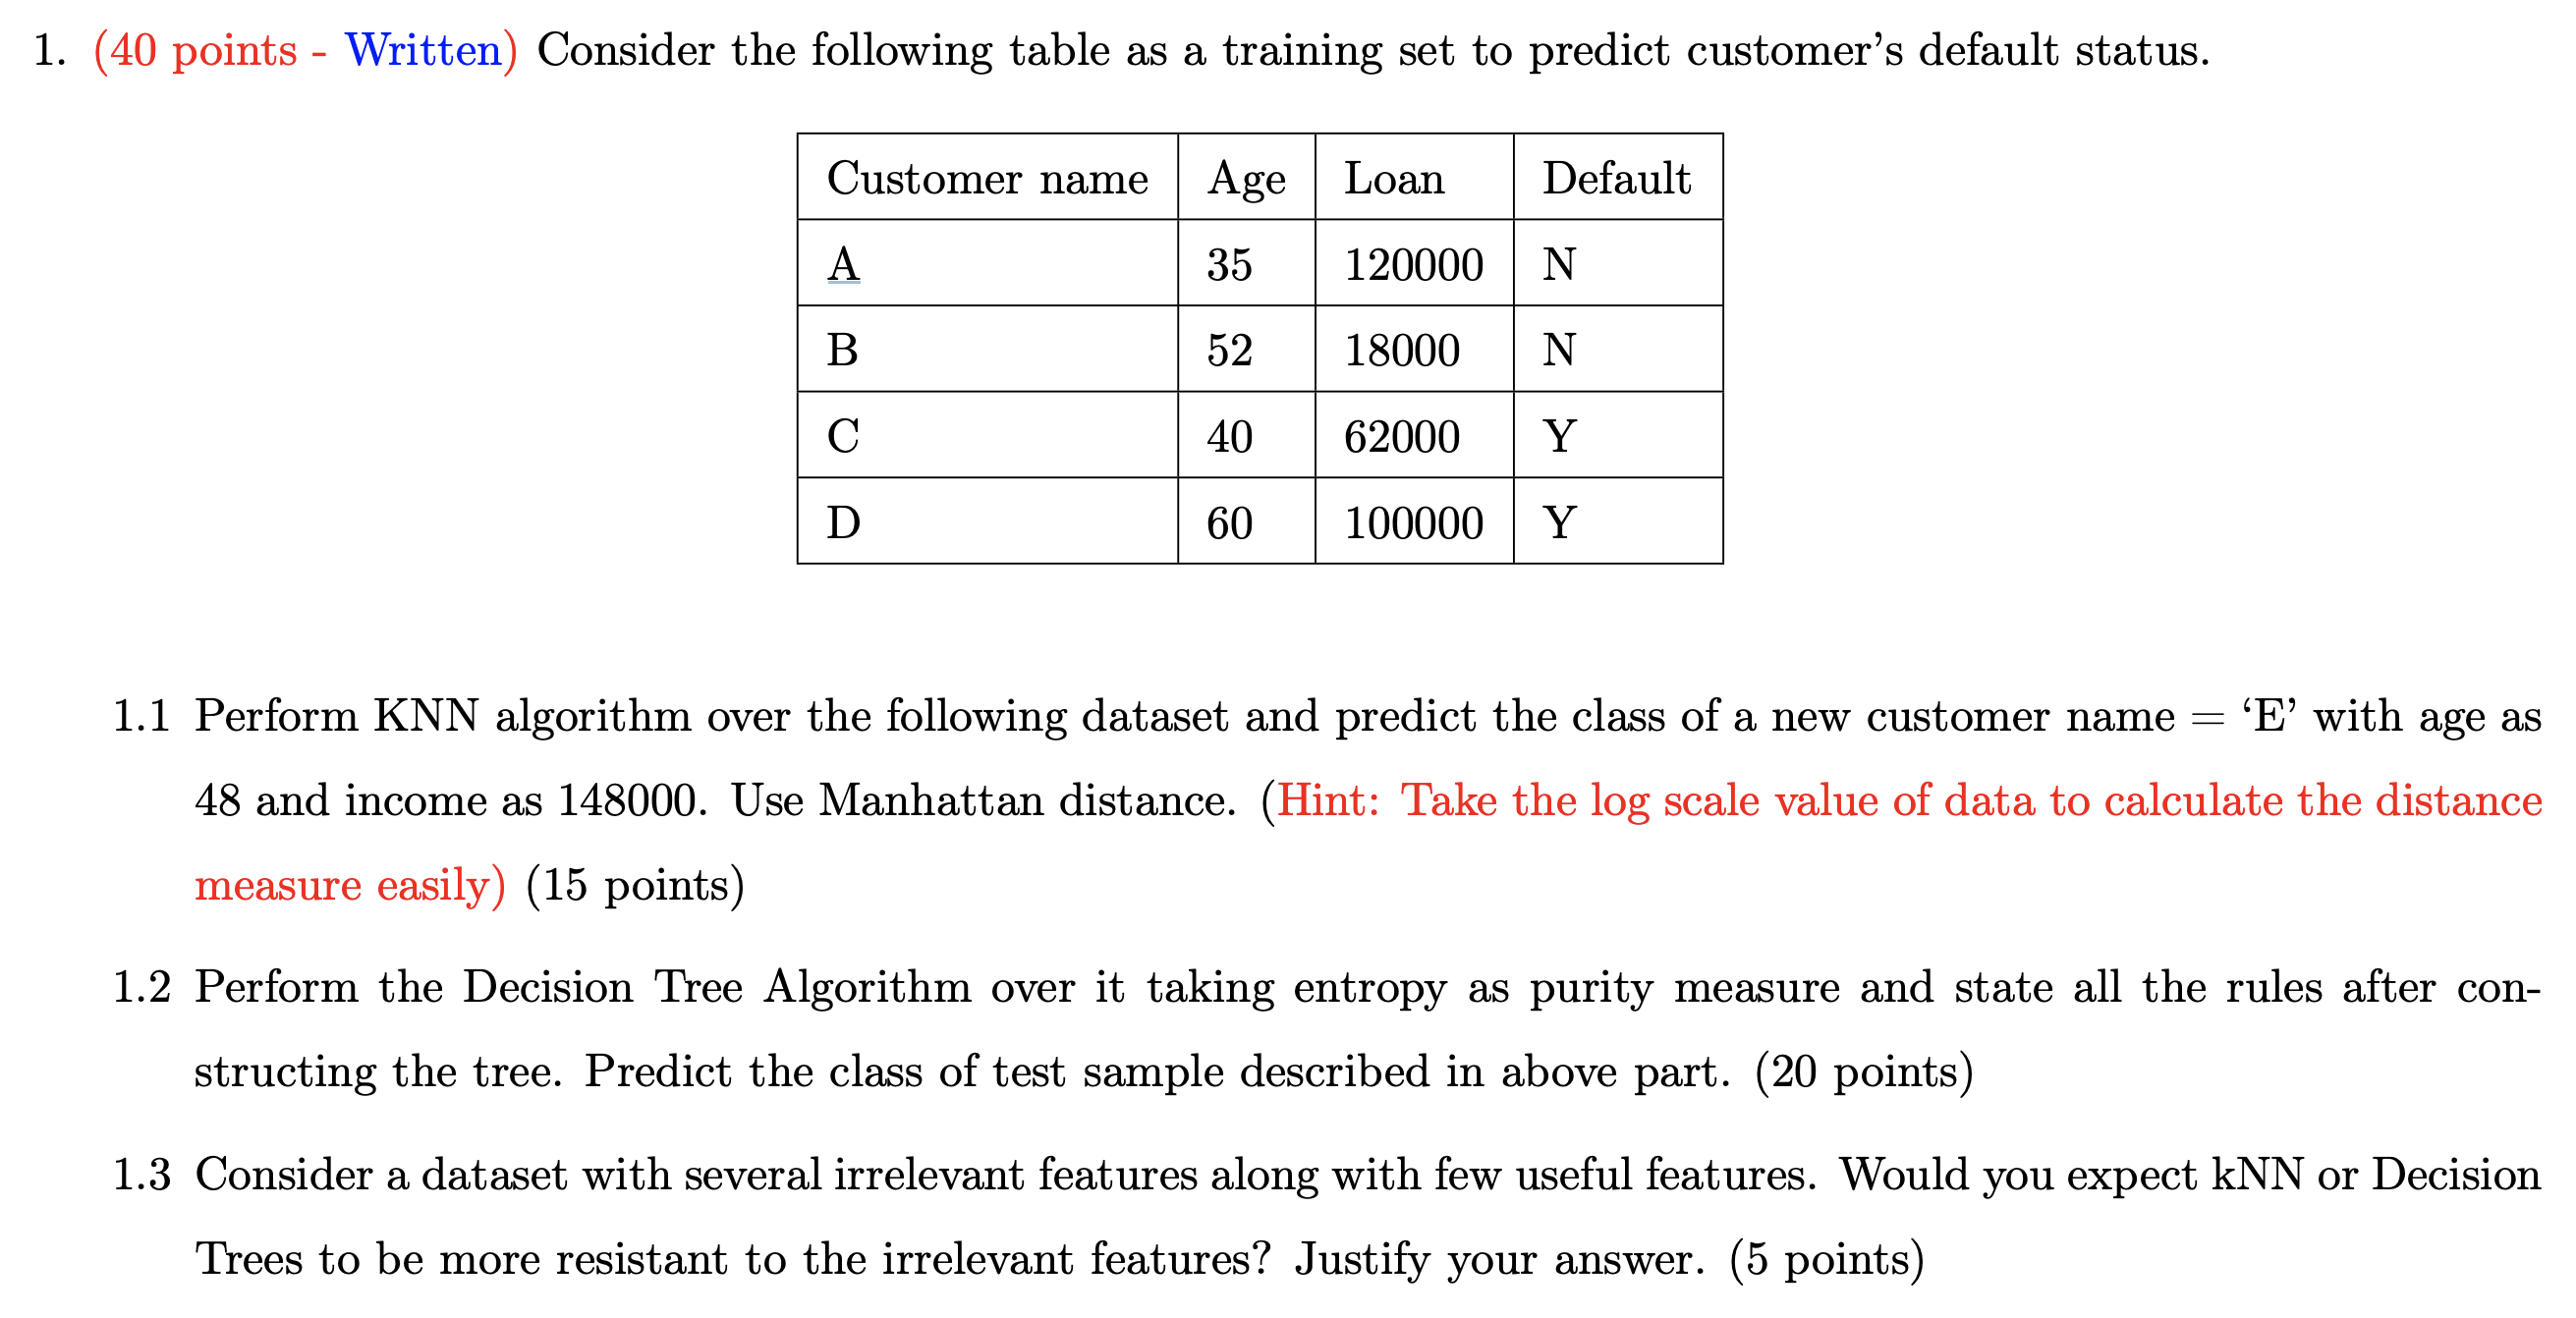

| Customer name | Age | Loan | log(Loan) | Default |
| :-: | -: |  -: | -: | -: |
| A | 35 | 120000 | $${log(120000)}=11.70$$ | N |
| B | 52 | 18000 | $$log(18000)=9.80$$ | N |
| C | 40 | 62000 | $$log(62000)=11.03$$ | Y |
| D | 60 | 100000 | $$log(100000)=11.51$$ | Y |
| E | 48 | 148000 | $$log(148000)=11.90$$ | ? |

### 1.1. Ranking the customers with Manhattan Distance

Suppose k=3, then customer E's label would be Y

| Customer name | Age | log(Loan) | Age(E) | log loan(E) | Manhattan distance from E | label | 
| :-: | -: |  -: |  -: |  -: |  -: | -: |
| B | 52 | 9.80 |48 | 11.90 | 6.1 | N |
| C | 40 | 11.03 |48 | 11.90 | 8.83 | Y |
| D | 60 | 11.51 |48 | 11.90 | 12.39 | Y |
| A | 35 | 11.70 |48 | 11.90 | 13.2 | N |

### 1.2. Decision Tree

Label Entropy:

$H(Label)=\sum{p_i*log(p_i)} = -0.5\times log(0.5)\times 2 \approx 0.693 $ 

##### Information Gain, by Age

$H(Label | Age<37.5)=0 $

$H(Label | Age>37.5)=-2/3 \times log(2/3)-1/3 \times log(1/3) \approx 0.637 $

$\therefore H(Label, Age, 37.5) = 1/4 \times 0 + 3/4 \times 0.637 \approx 0.477 $

$\therefore IG(Label, Age, 37.5) = 0.693-0.477 \approx 0.216 $

$ IG(Label, Age, 46) = 0.693 - 0.693 = 0 $

$ IG(Label, Age, 56) = 0.693 - 0.477 \approx 0.216 $

$ max(IG(Label|Age)) \approx 0.216 $

| Customer name | Age | log(Loan) | label | IG |
| :-: | -: |  -: | -: | -: |
| A | 35 | 11.70 | N | 0.216 (Age=37.5) |
| C | 40 | 11.03 | Y | 0 (Age=46) |
| B | 52 | 9.80 | N | 0.216 (Age=56) |
| D | 60 | 11.51 | Y | - |

##### Information Gain, by log(Loan)

| Customer name | Age | log(Loan) | label | IG |
| :-: | -: |  -: | -: | -: |
| B | 52 | 9.80 | N | 0.216 (loan=10.415) |
| C | 40 | 11.03 | Y | 0 (loan=11.27) |
| D | 60 | 11.51 | Y | 0.216 (loan=11.605) |
| A | 35 | 11.70 | N | - |




### As shown in the table, the Information Gain for Age and Loan are equal. So I prefer Age to be the root node. And I'll split the data by Age=37.5, then split the rest part of data with Loan>10.415. 

### According to the decision tree shows below, customer E should be predicted with label Y.

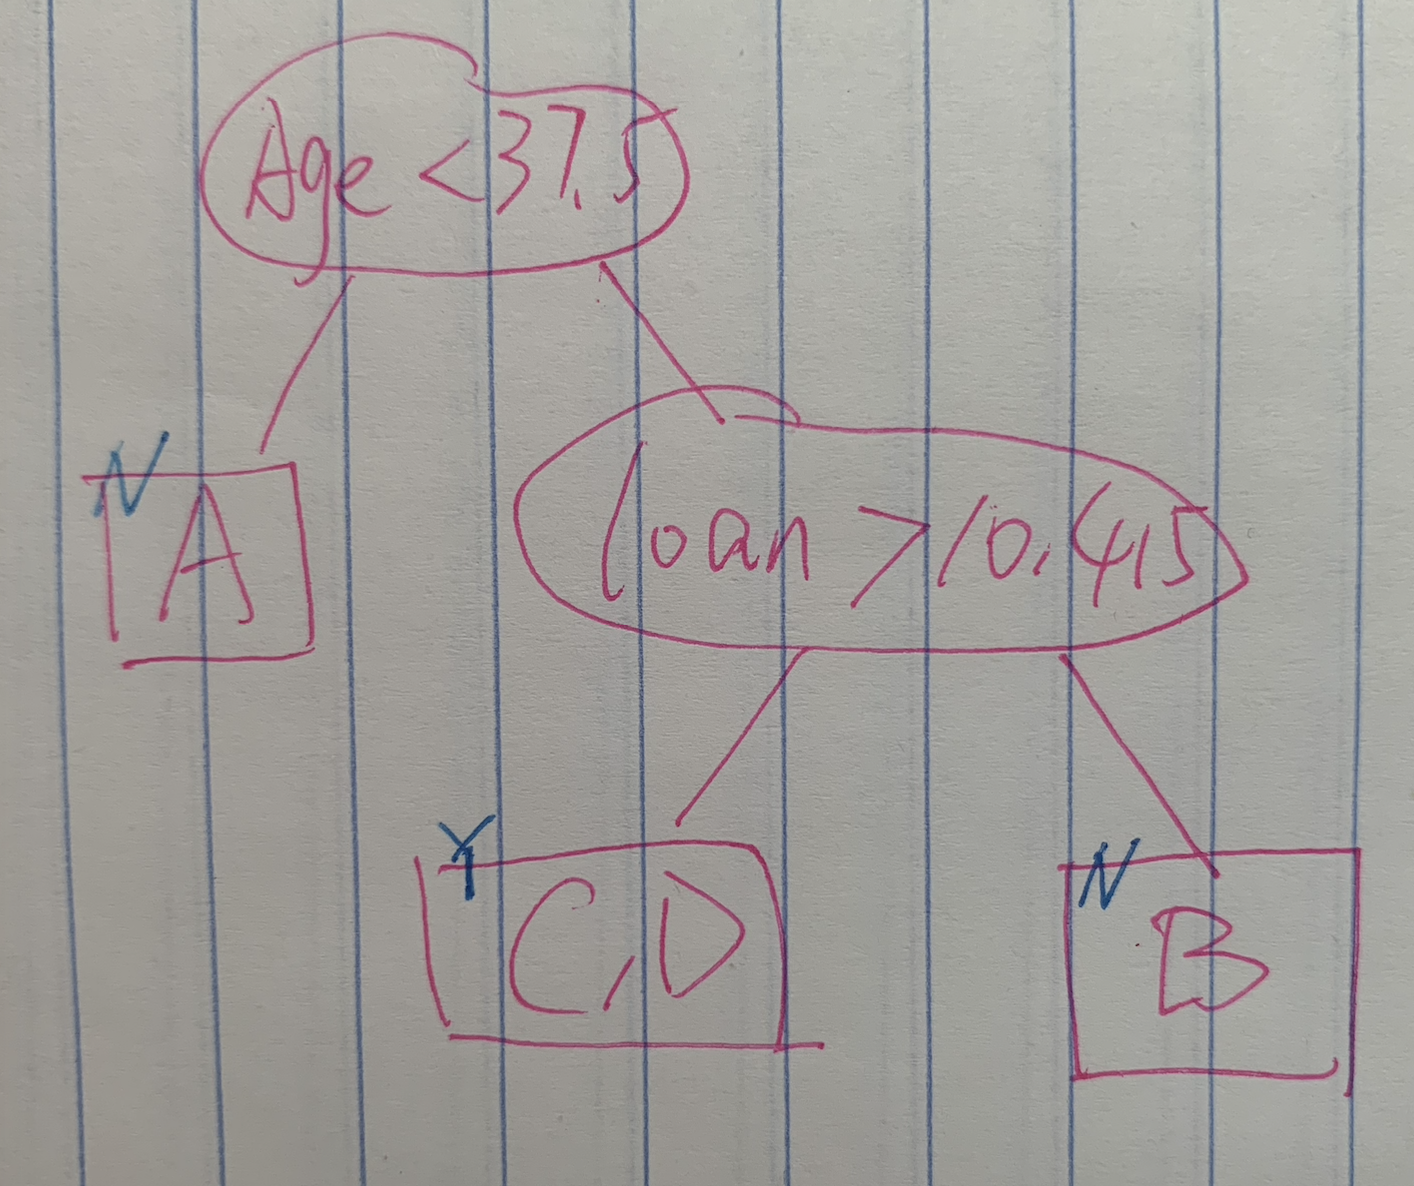


[Text(0.4, 0.8333333333333334, 'X[1] <= 10.415\nentropy = 1.0\nsamples = 4\nvalue = [2, 2]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6, 0.5, 'X[0] <= 37.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]')]

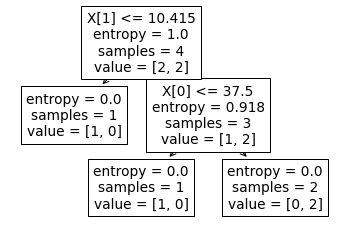

In [1]:
# visualization
import pandas as pd
import numpy as np
from sklearn import tree
X = pd.DataFrame(np.array([[52,40,60,35],[9.8,11.03,11.51,11.70]]).T, columns=['Age', 'Loan'])
y = pd.Series(['N','Y','Y','N'])
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X, y)
tree.plot_tree(clf)

### 1.3. Consider a dataset with several irrelevant features along with few useful features. Would you expect kNN or Decision Trees to be more resistant to the irrelevant features? Justify your answer. (5 points)

***

Decision Tree is expected due to the reason that there are few useful features in the dataset.

kNN uses top k closest node to identify the label of unknown sample. Each sample is using all the features no matter how much information it offers. That would have nagetive effects on prediction.

Decision Trees naturally uses the most meaningful features to make its classification decisions to the dataset. Therefore, Decision Tree Algorithm would be less affected by less qualified features.

***

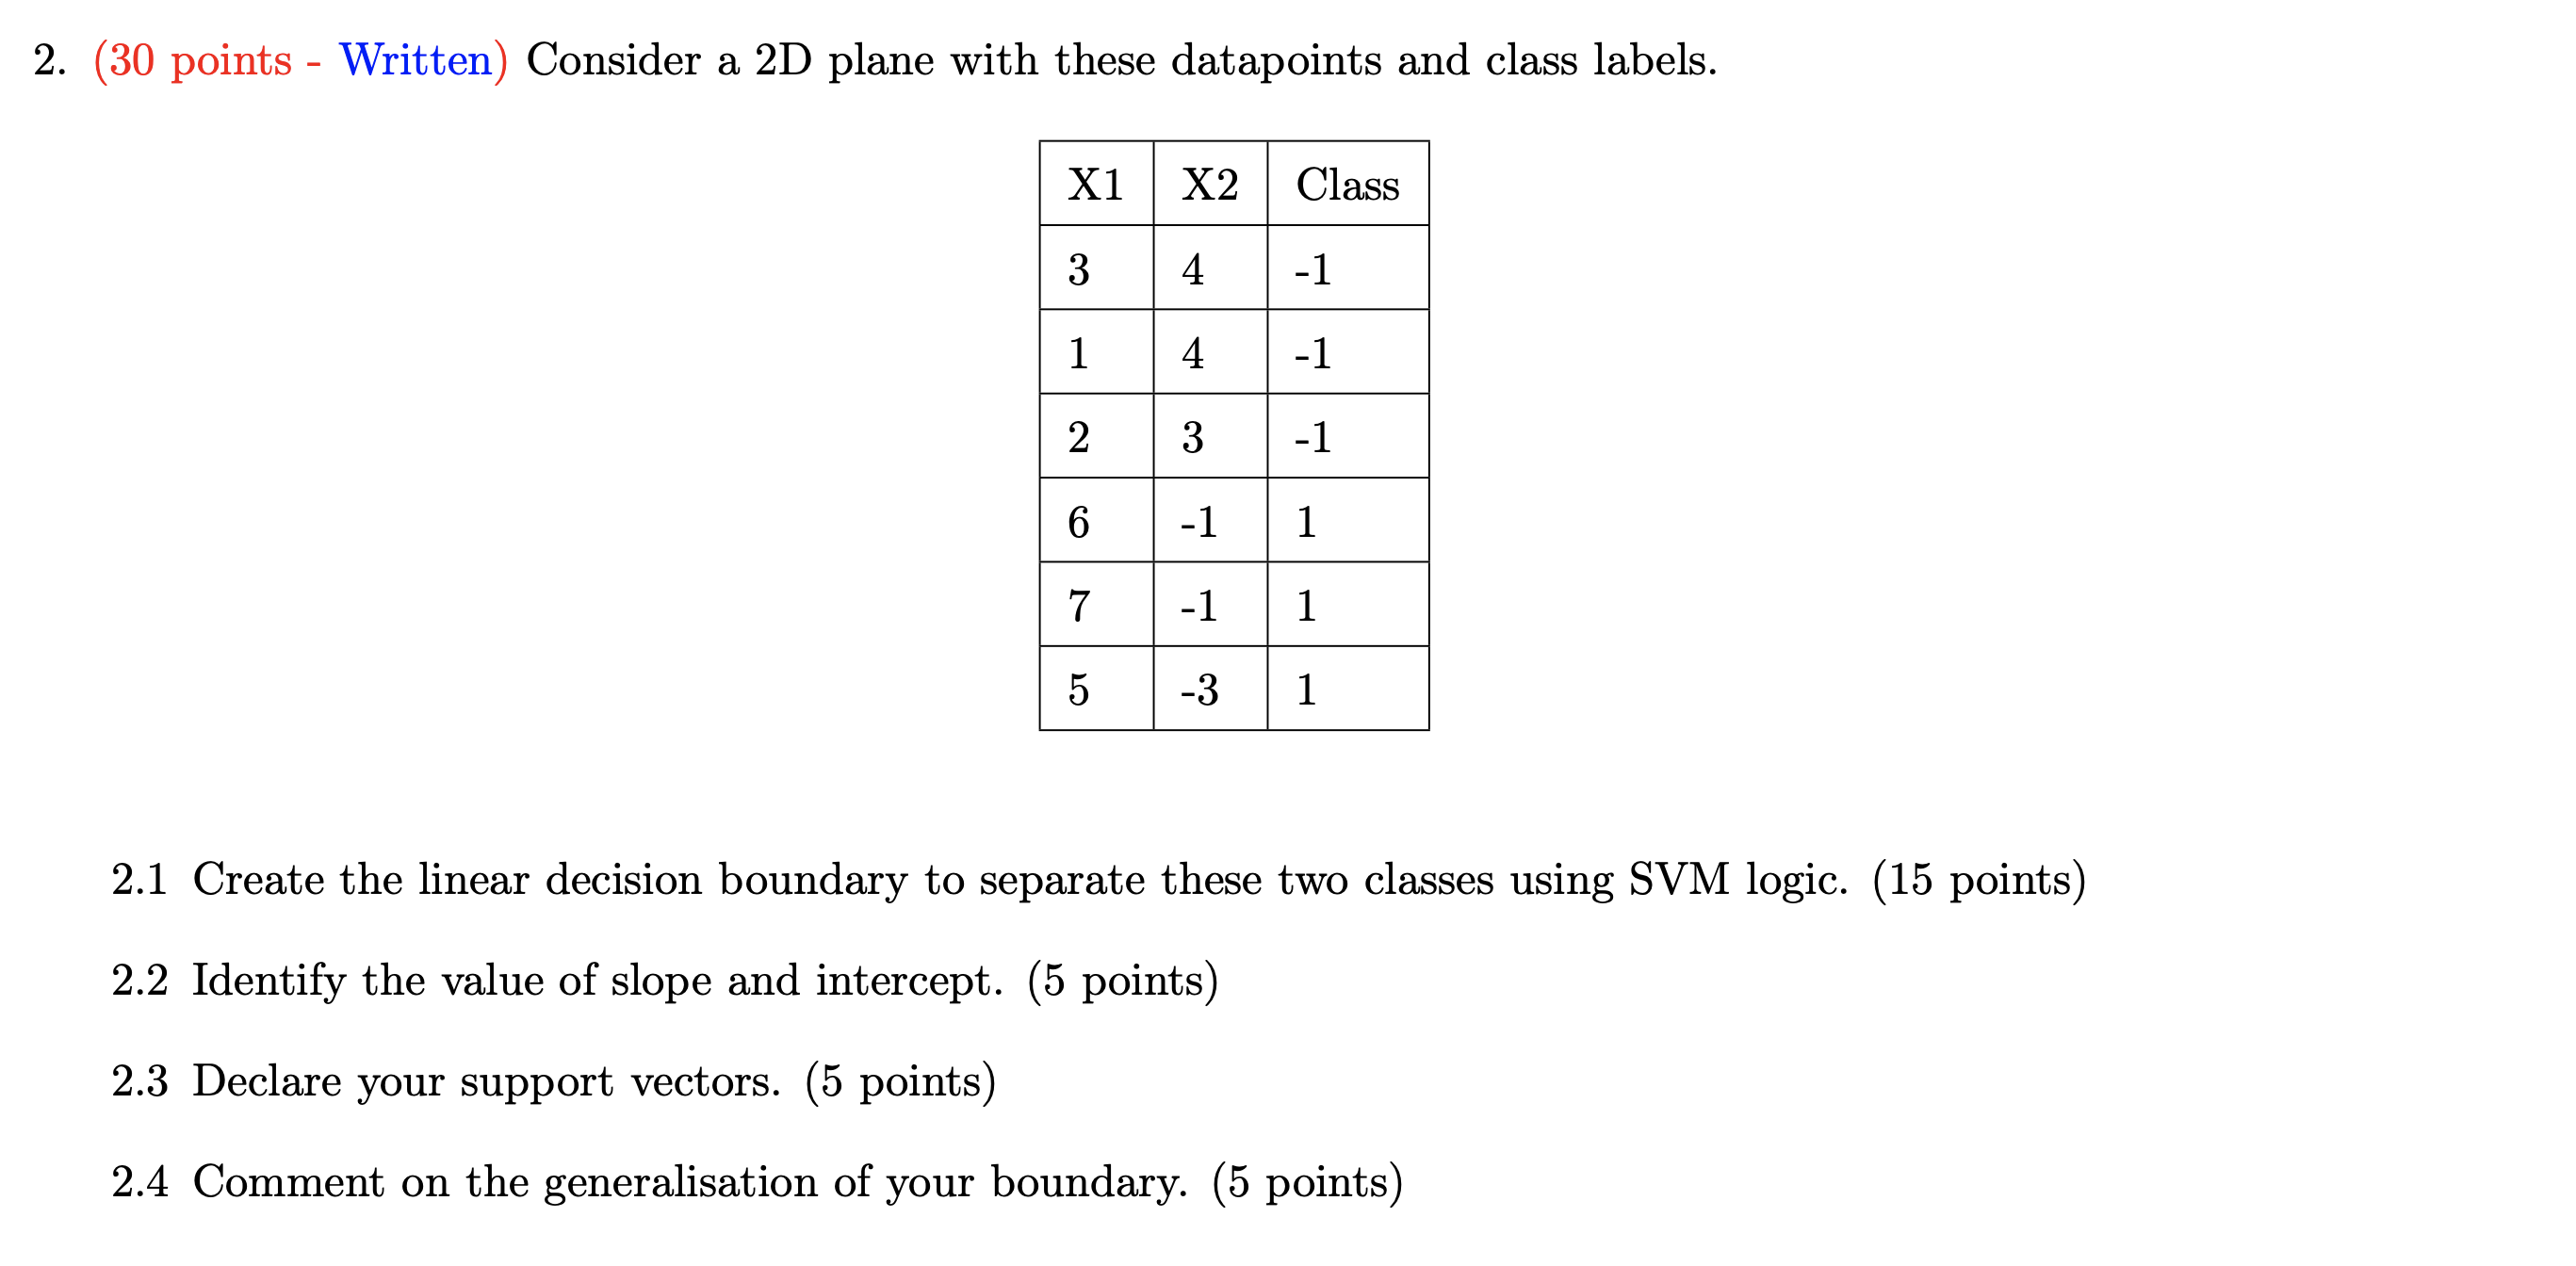


#### First, let's point out all the nodes in a 2D space

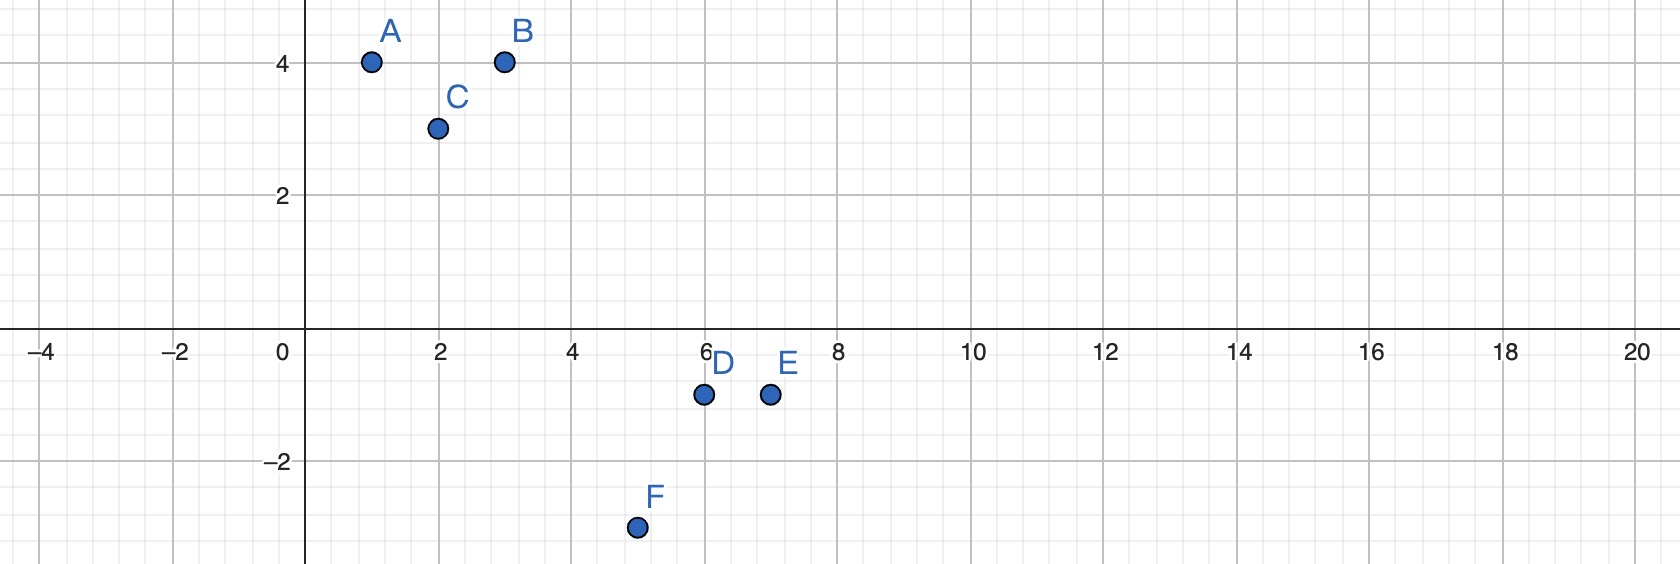

#### For any point $X_n$ lay on the Hyperplane $w^TX_n+w_0$, the distance from $X_n$ to the hyperplane must be zero. Therefore, make $w^TX_n+w_0=0$, and culculate the hyperplane across point B and C, here I got the figure plot below:

#### The decision boundary based on node B and C is :

In [2]:
w1=-1
w2=1
w0=-1
print("for x=[2,3], let w1=%d, w2=%d, w0=%d, then 2*w1+3*w2+w0 = %.2f"% (w1,w2,w0,2*w1+3*w2+w0))
print("for x=[3,4], let w1=%d, w2=%d, w0=%d, then 3*w1+4*w2+w0 = %.2f"% (w1,w2,w0,3*w1+4*w2+w0))

for x=[2,3], let w1=-1, w2=1, w0=-1, then 2*w1+3*w2+w0 = 0.00
for x=[3,4], let w1=-1, w2=1, w0=-1, then 3*w1+4*w2+w0 = 0.00


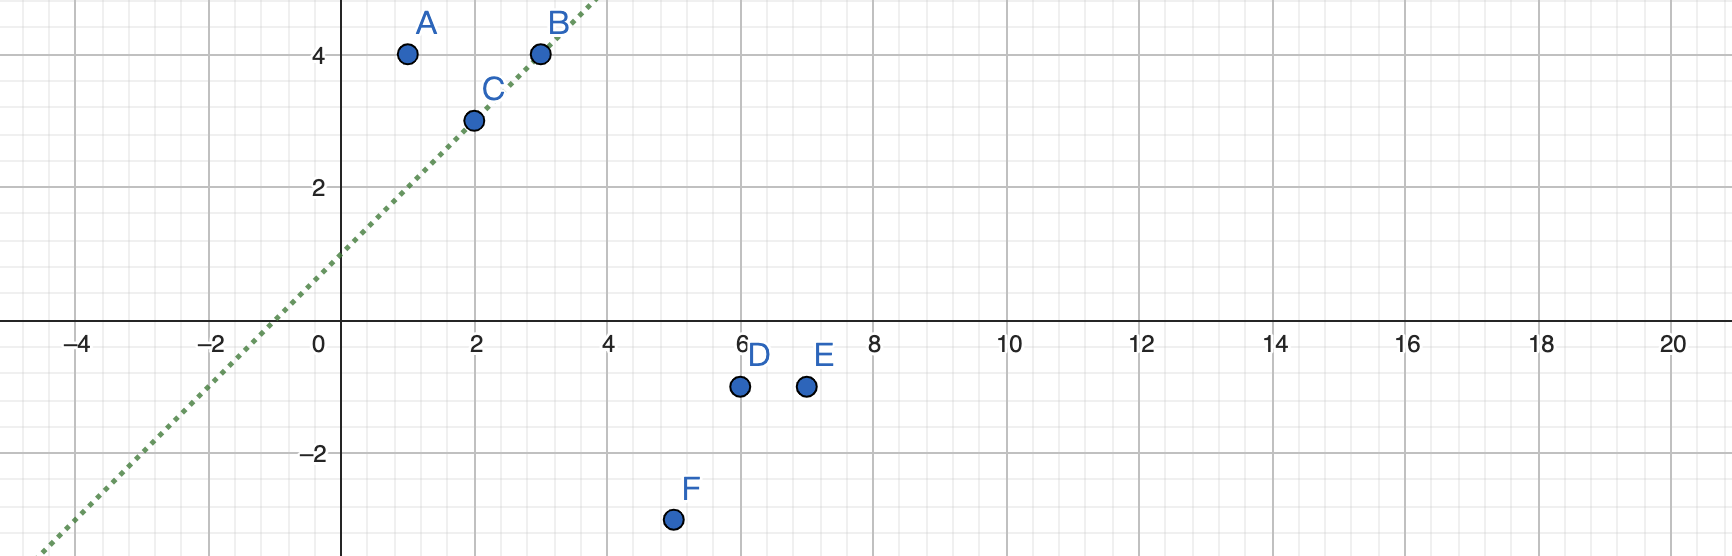

#### Similarly, the decision boundary across node D and parallel to the green hyperplane plotted as a red dotted line below:

In [3]:
w1=1
w2=-1
w0=-7
print("for x=[6, -1], let w1=%d, w2=%d, w0=%d, then -6*w1+w2-w0 = %.2f"% (w1,w2,w0,-6*w1+w2-w0))

for x=[6, -1], let w1=1, w2=-1, w0=-7, then -6*w1+w2-w0 = 0.00


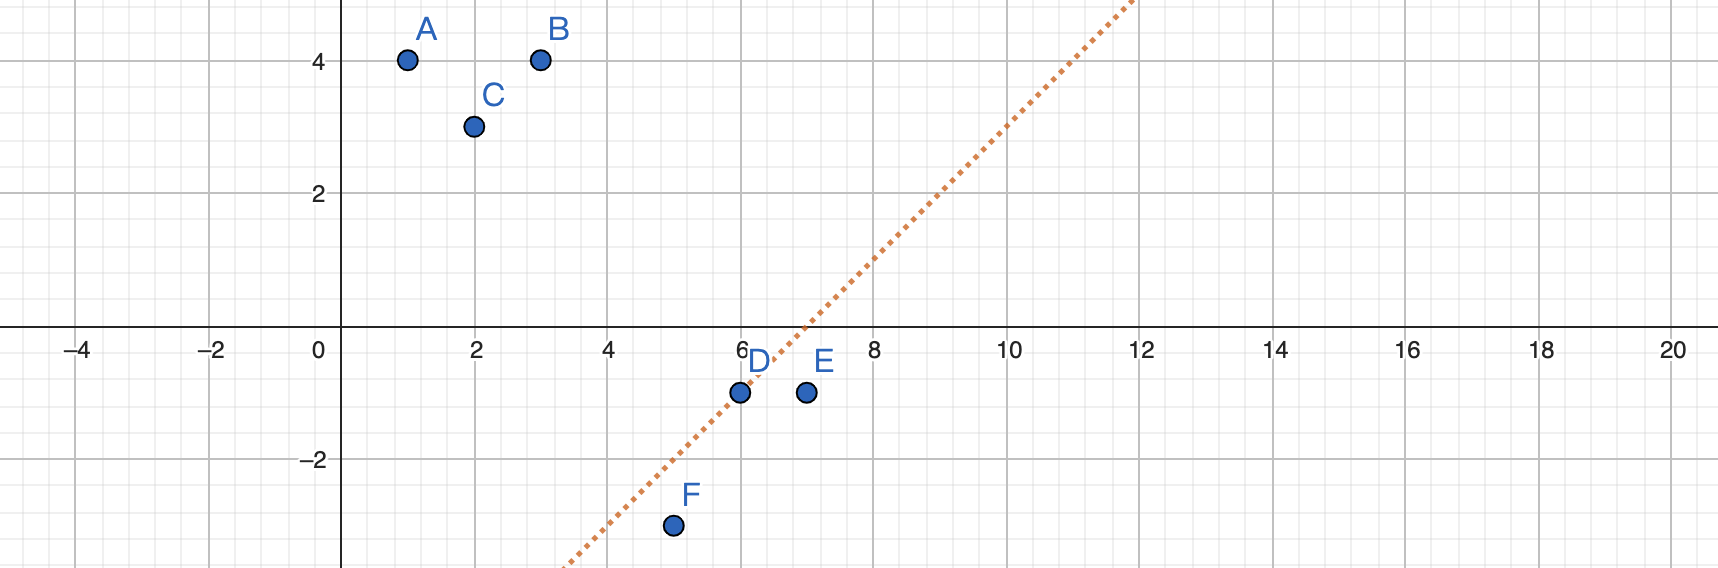

#### Therefore the large-margin separating hyperplane will be defined as below:

Let the distance $2*w1+3*w2+w_0$ equals to the distance $-6*w1+w2-w_0$, and make an equation, then $\color{red}{8*w1+2*w2+2*w_0=0}$

Freeze w1,w2, then the new $w_0$ will be -3


In [4]:
w1=1
w2=-1
w0=-3
print("for x=[2, 3],     let w1=%d, w2=%d, w0=%d, then 2*w1+3*w2+w0 = %.2f"% (w1,w2,w0,2*w1+3*w2+w0))
print("for x=[3, 4],     let w1=%d, w2=%d, w0=%d, then 3*w1+4*w2+w0 = %.2f"% (w1,w2,w0,3*w1+4*w2+w0))
print("for x=[6,-1],     let w1=%d, w2=%d, w0=%d, then -6*w1+w2-w0 = %.2f"% (w1,w2,w0,-6*w1+w2-w0))
print("for large-margin, let w1=%d, w2=%d, w0=%d, then 8∗w1+2∗w2+2∗w0 = %.2f"% (w1,w2,w0,8*w1+2*w2+2*w0))


for x=[2, 3],     let w1=1, w2=-1, w0=-3, then 2*w1+3*w2+w0 = -4.00
for x=[3, 4],     let w1=1, w2=-1, w0=-3, then 3*w1+4*w2+w0 = -4.00
for x=[6,-1],     let w1=1, w2=-1, w0=-3, then -6*w1+w2-w0 = -4.00
for large-margin, let w1=1, w2=-1, w0=-3, then 8∗w1+2∗w2+2∗w0 = 0.00


<!-- 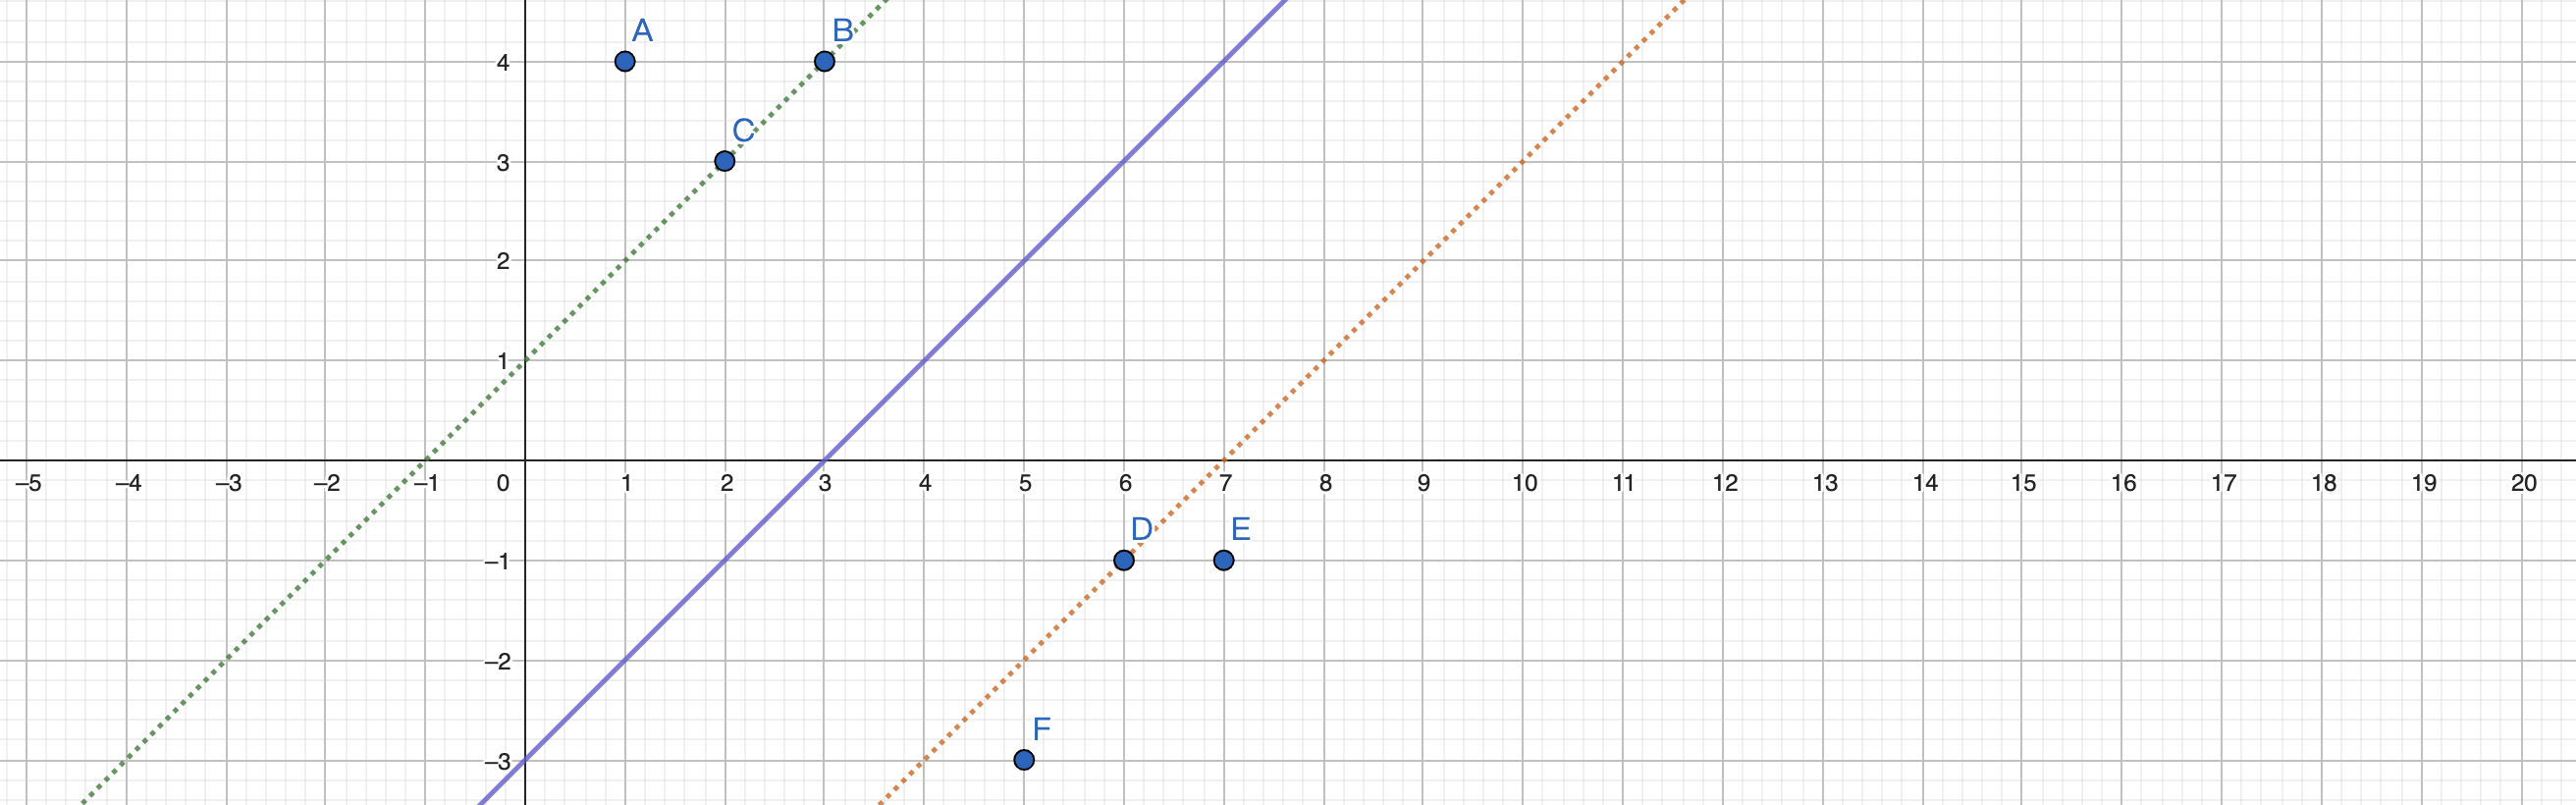 -->
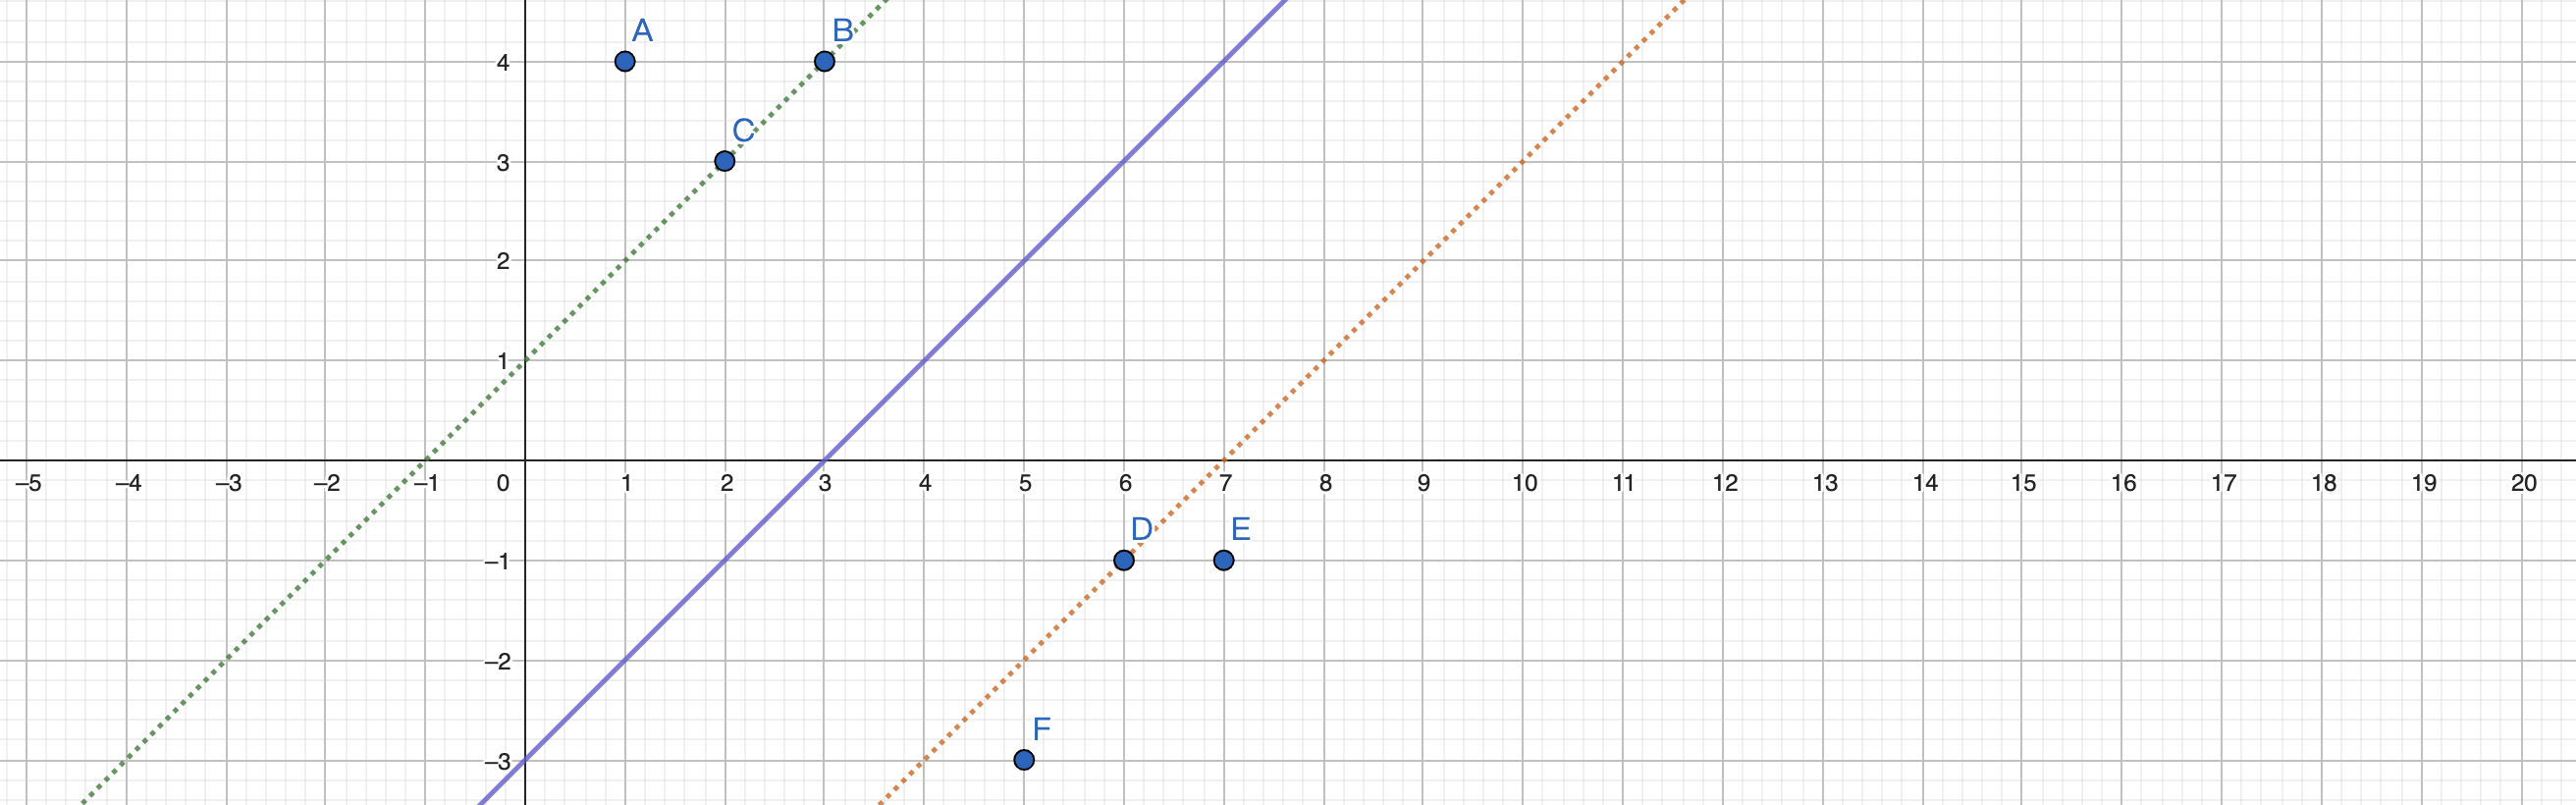

### $\color{red}{\text{Conclusion}}$

$\color{red}{\text{This decision boundary defines the margin to 8 to separate those two classes.}}$

$\color{red}{\text{Support vectors that I'm using are B(3,4), C(2,3), D(6,-1)}}$

$\color{red}{\text{The hyperplane is $x1-x2-3=0$}}$

$\color{red}{\text{The Slope is -1, Intercept is -3}}$

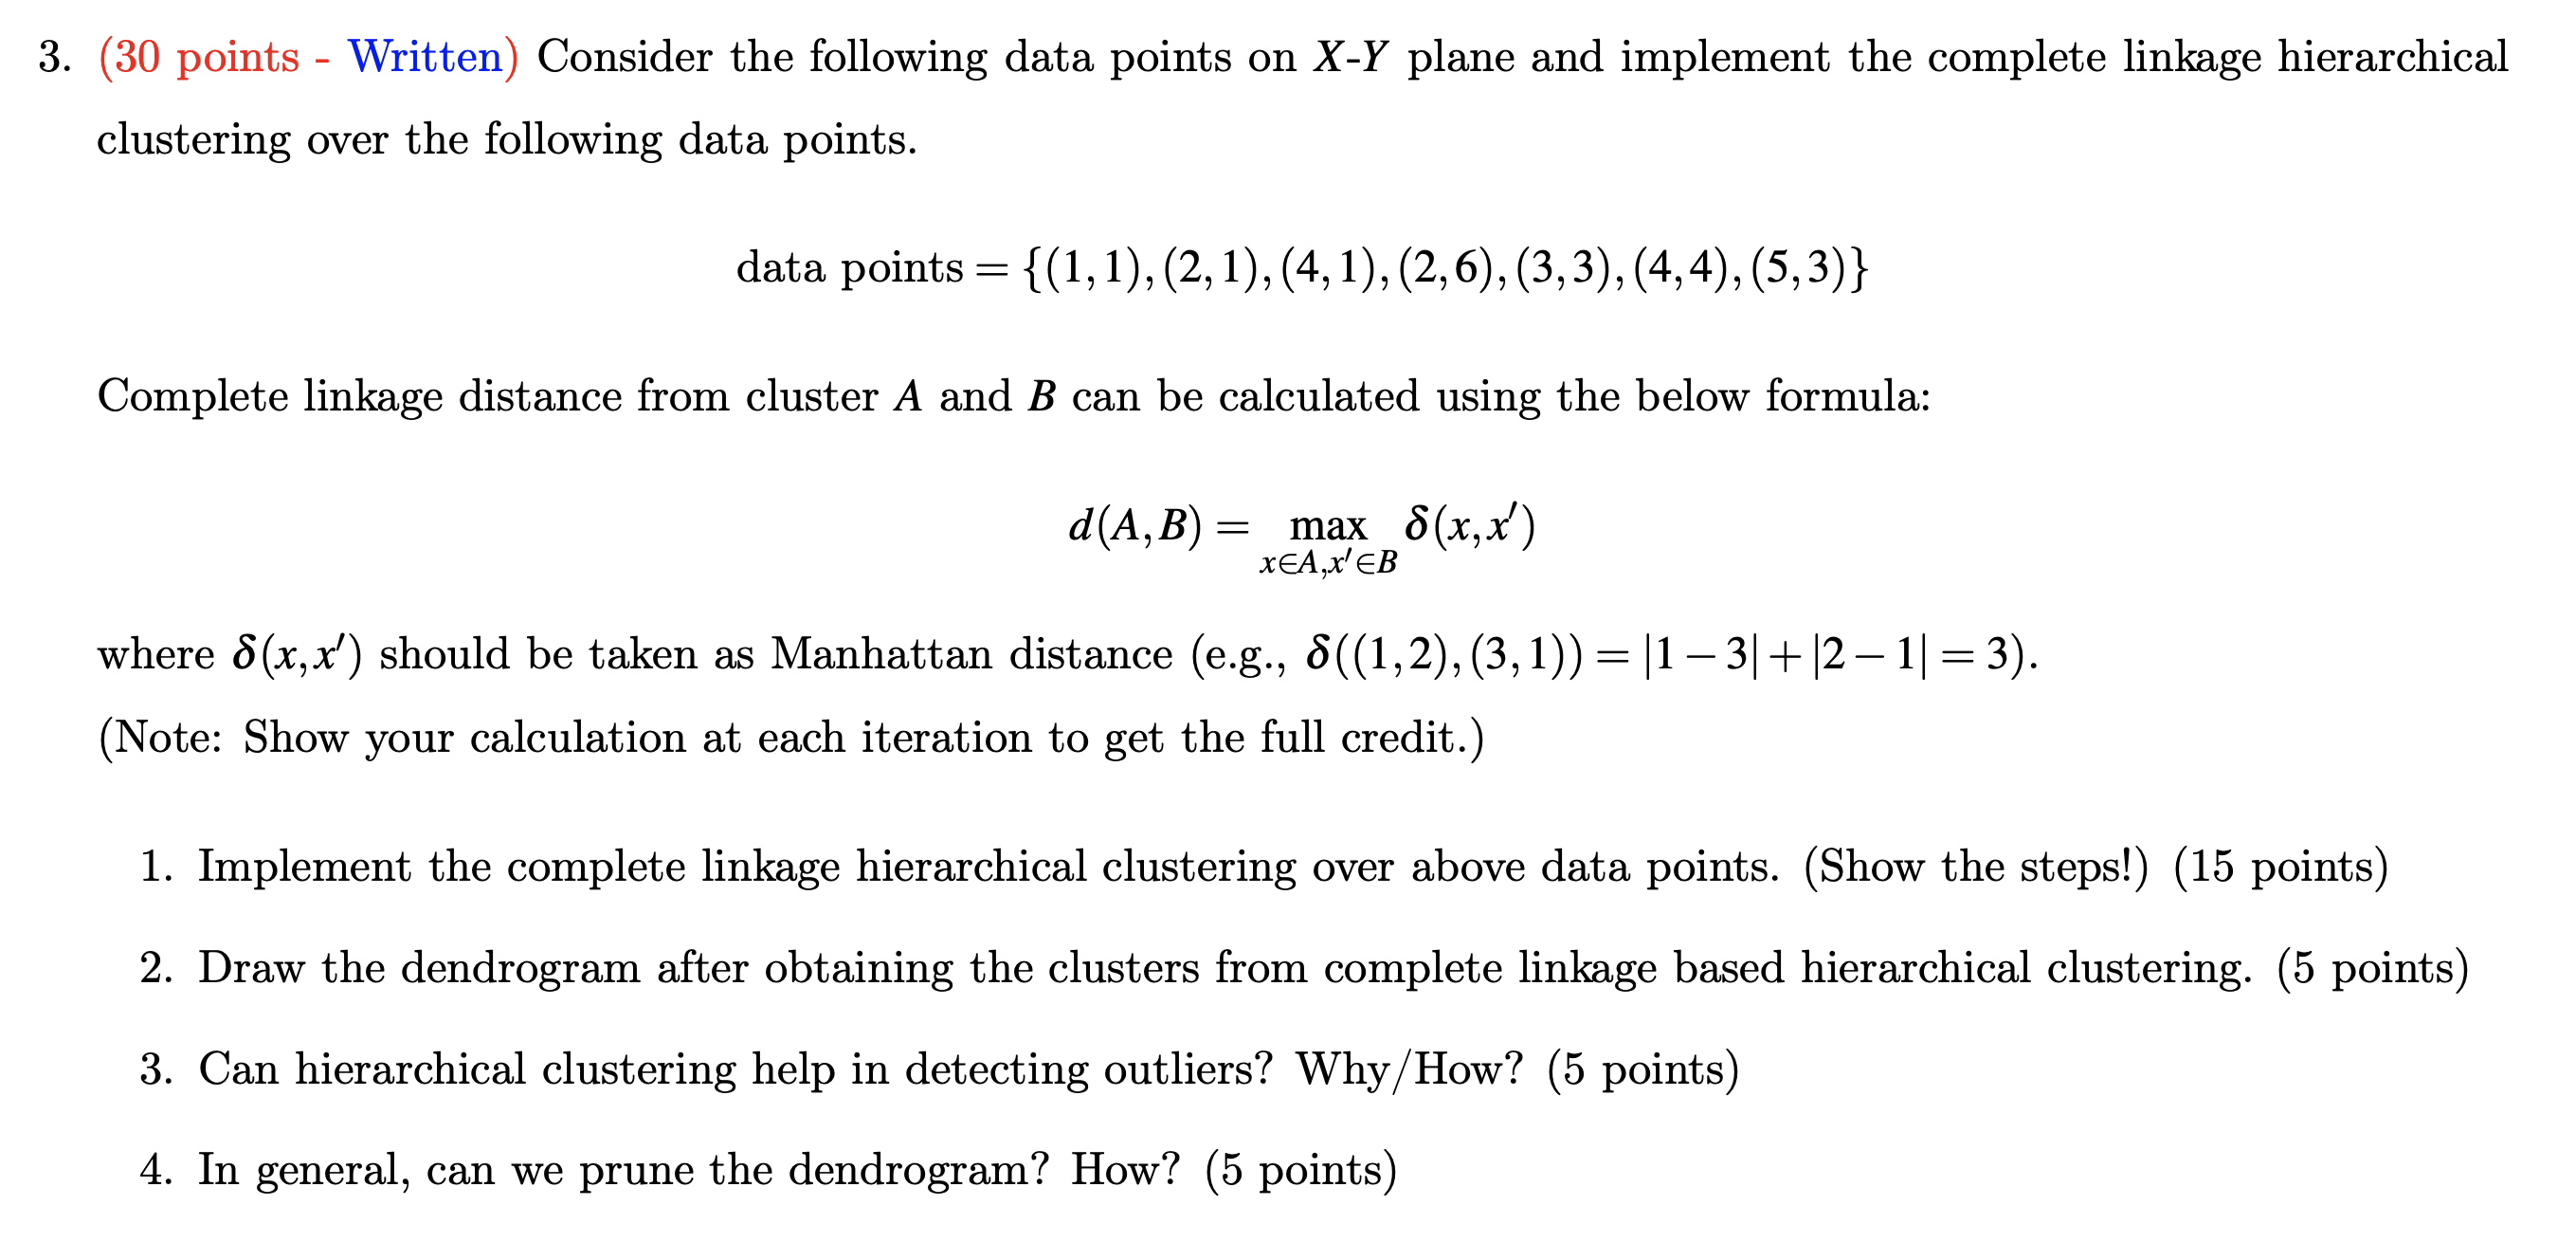

| No | x1 | x2 |
| :-: | -: |  -: |
| A | 1 | 1 |
| B | 2 | 1 |
| C | 4 | 1 |
| D | 2 | 6 |
| E | 3 | 3 |
| F | 4 | 4 |
| G | 5 | 3 |

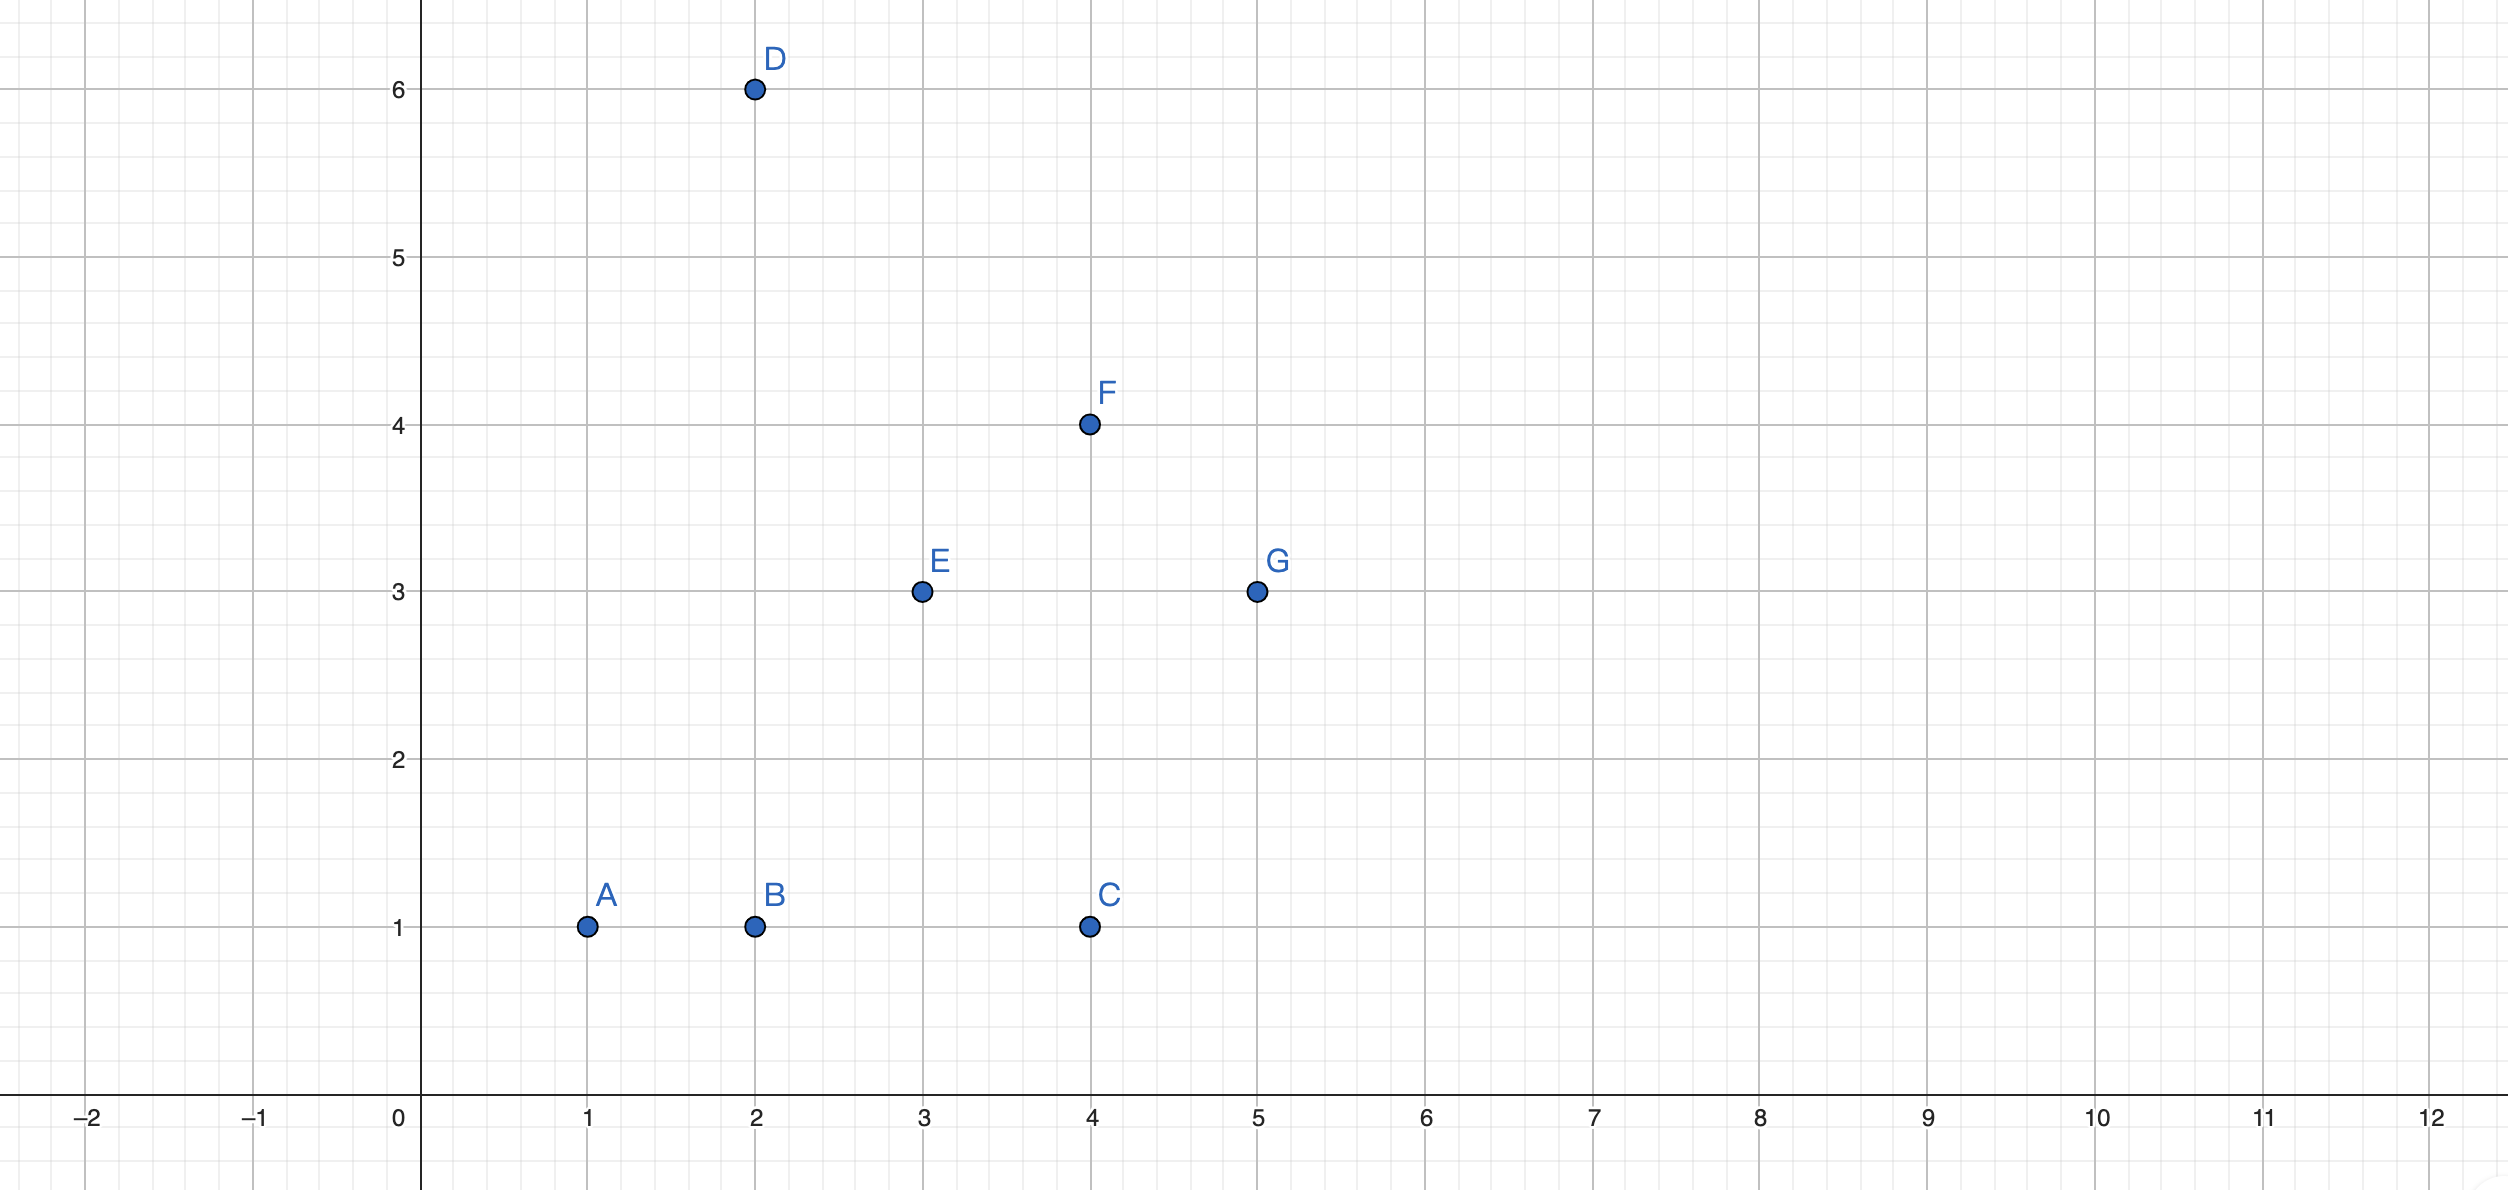

### Complete Linkage Hierarchical Clustering
### Step1 : Preparing distance matrix
| Distance | A | B | C | D | E | F | G |
| :-: | -: |  -: |  -: |  -: |  -: |  -: |  -: |
| A | 0 | - | - | - | - | - | - |
| B | 1 | 0 | - | - | - | - | - |
| C | 3 | 2 | 0 | - | - | - | - |
| D | 5.099 | 5 | 5.385 | 0 | - | - | - |
| E | 2.828 | 2.236 | 2.236 | 3.162 | 0 | - | - |
| F | 4.243 | 3.606 | 3 | 2.828 | 1.414 | 0 | - |
| G | 4.472 | 3.606 | 2.236 | 4.243 | 2 | 1.414 | 0 |

### Step2, link nodes with $\color{red}{D(A,B)=1}$

| Distance | A | B | C | D | E | F | G |
| :-: | -: |  -: |  -: |  -: |  -: |  -: |  -: |
| A | 0 | - | - | - | - | - | - |
| B | 1 | 0 | - | - | - | - | - |
| C | 3 | 2 | 0 | - | - | - | - |
| D | 5.099 | 5 | 5.385 | 0 | - | - | - |
| E | 2.828 | 2.236 | 2.236 | 3.162 | 0 | - | - |
| F | 4.243 | 3.606 | 3 | 2.828 | 1.414 | 0 | - |
| G | 4.472 | 3.606 | 2.236 | 4.243 | 2 | 1.414 | 0 |

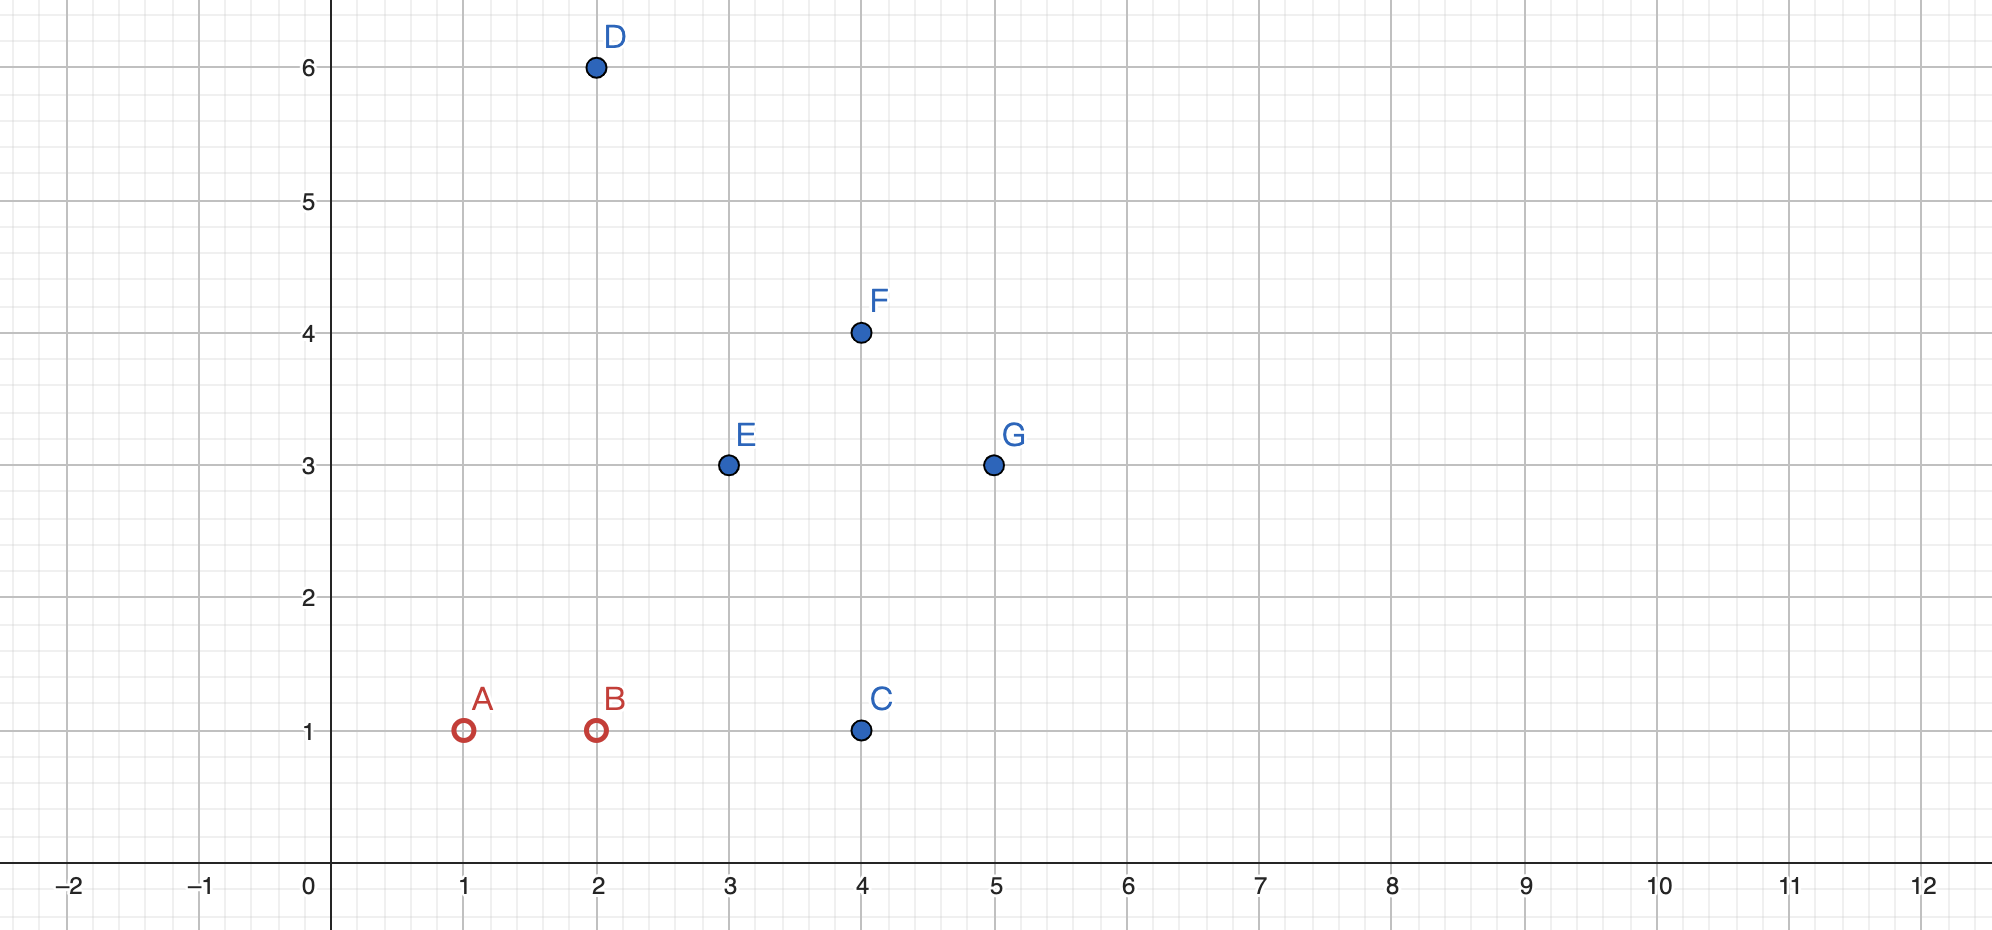

### Step3, link nodes with $\color{red}{D(F,G)=1.414}$

| Distance | A | B | C | D | E | F | G |
| :-: | -: |  -: |  -: |  -: |  -: |  -: |  -: |
| A | 0 | - | - | - | - | - | - |
| B | 1 | 0 | - | - | - | - | - |
| C | 3 | 2 | 0 | - | - | - | - |
| D | 5.099 | 5 | 5.385 | 0 | - | - | - |
| E | 2.828 | 2.236 | 2.236 | 3.162 | 0 | - | - |
| F | 4.243 | 3.606 | 3 | 2.828 | 1.414 | 0 | - |
| G | 4.472 | 3.606 | 2.236 | 4.243 | 2 | 1.414 | 0 |

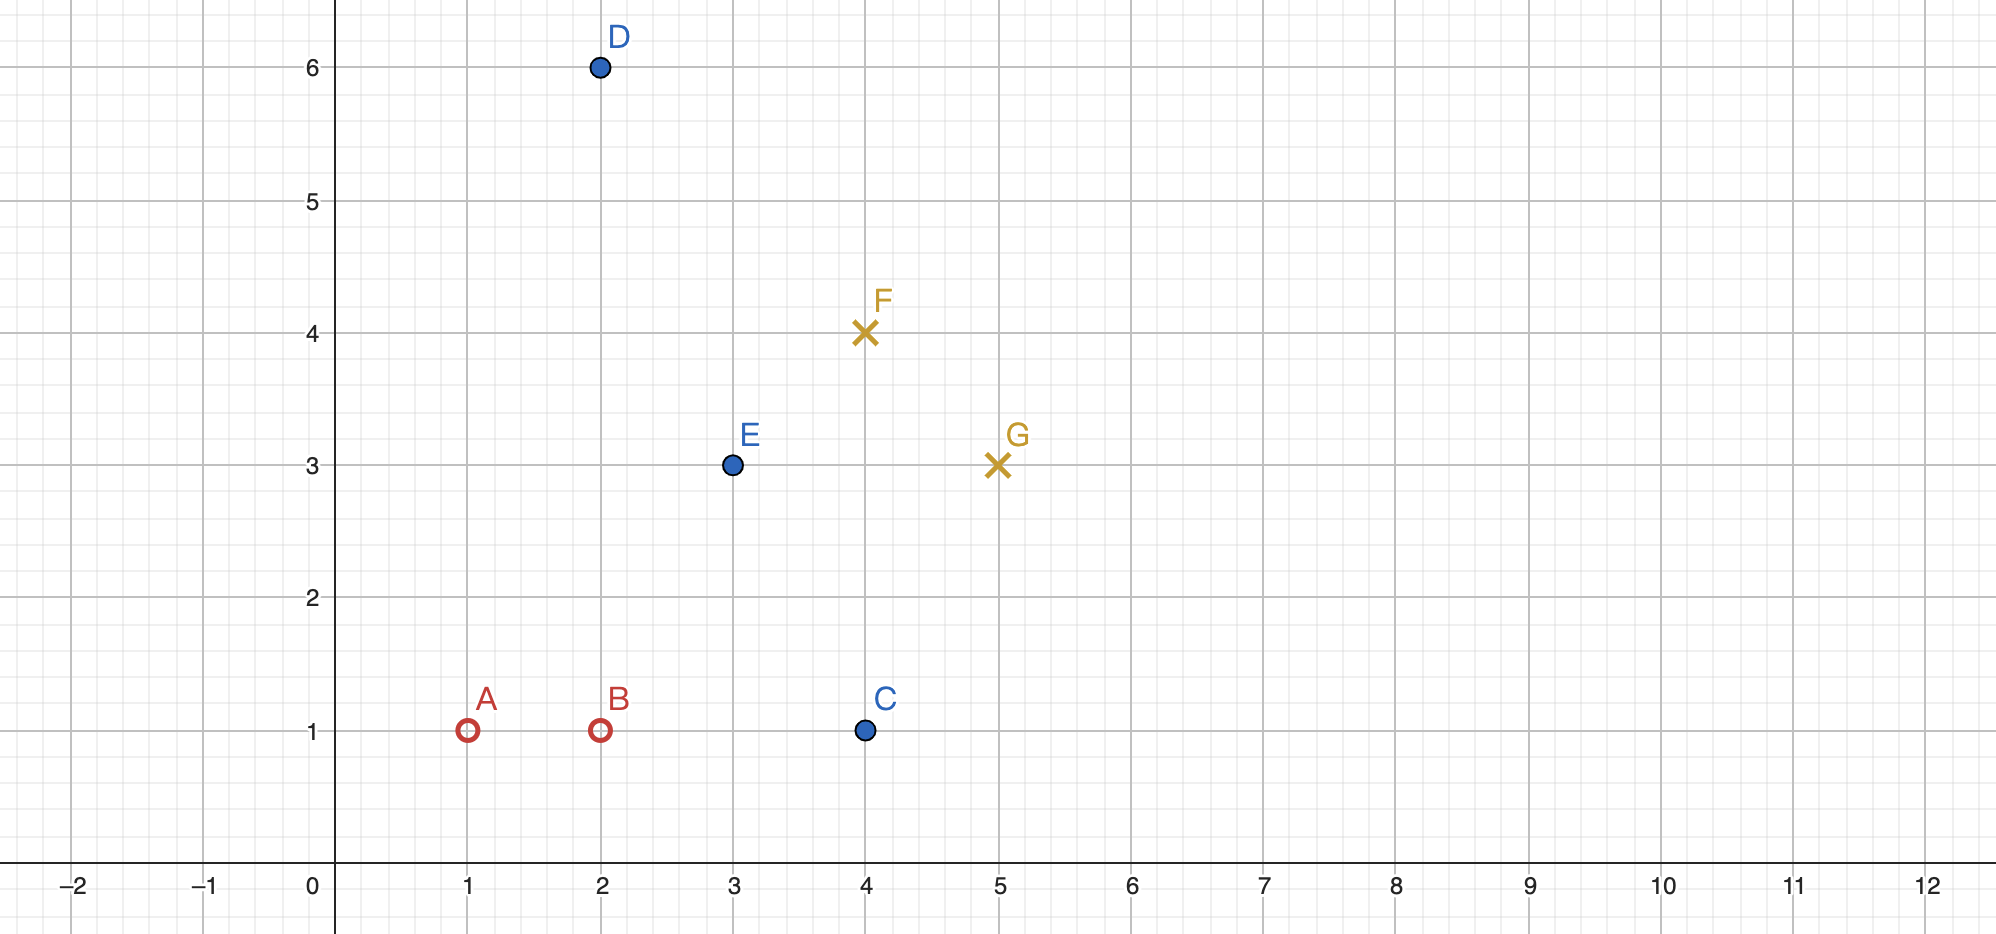

### Step4, link node E with $\color{red}{D(E,G)=2}$

| Distance | A | B | C | D | E | F | G |
| :-: | -: |  -: |  -: |  -: |  -: |  -: |  -: |
| A | 0 | - | - | - | - | - | - |
| B | 1 | 0 | - | - | - | - | - |
| C | 3 | 2 | 0 | - | - | - | - |
| D | 5.099 | 5 | 5.385 | 0 | - | - | - |
| E | 2.828 | 2.236 | 2.236 | 3.162 | 0 | - | - |
| F | 4.243 | 3.606 | 3 | 2.828 | 1.414 | 0 | - |
| G | 4.472 | 3.606 | 2.236 | 4.243 | 2 | 1.414 | 0 |

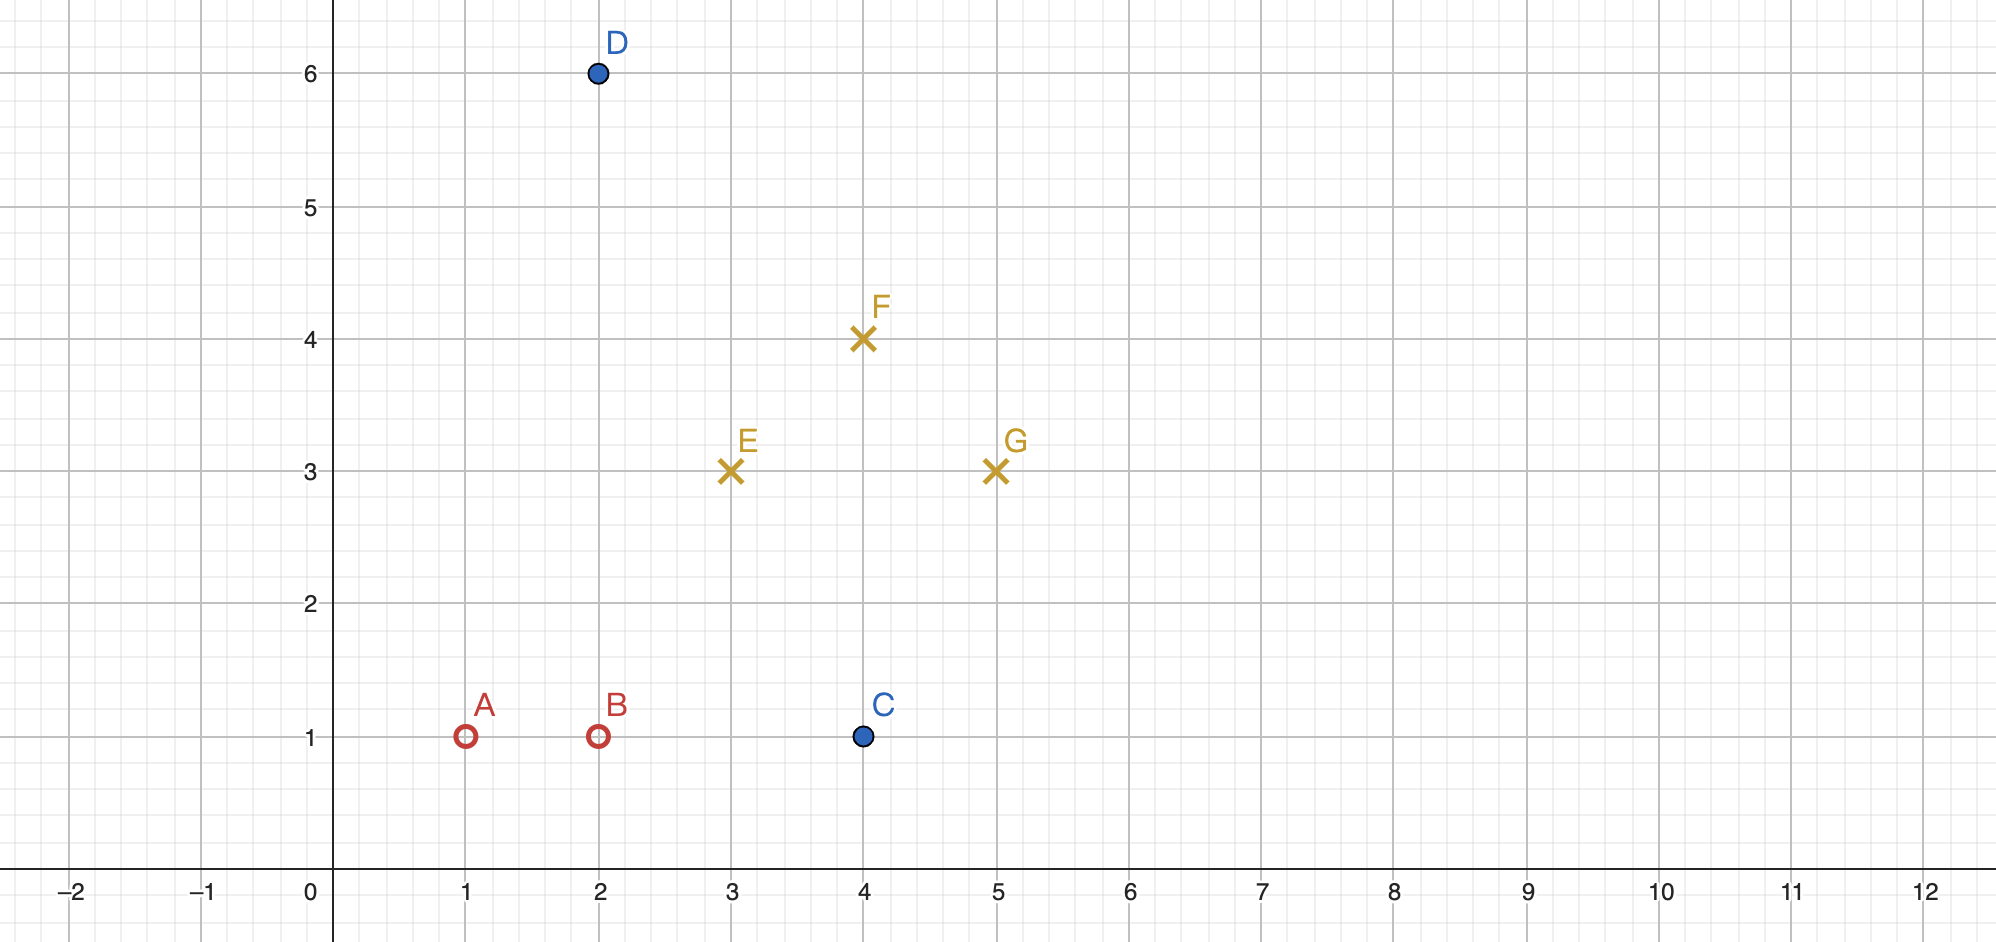

### Step5, link node C with $\color{red}{D(F,C)=3}$

Since there is no difference to merge node C into Group{A,B} or Group{E,F,G}, it will lead to a different result while merging node D. Here I choose Group{E,F,G}

| Distance | A | B | C | D | E | F | G |
| :-: | -: |  -: |  -: |  -: |  -: |  -: |  -: |
| A | 0 | - | - | - | - | - | - |
| B | 1 | 0 | - | - | - | - | - |
| C | 3 | 2 | 0 | - | - | - | - |
| D | 5.099 | 5 | 5.385 | 0 | - | - | - |
| E | 2.828 | 2.236 | 2.236 | 3.162 | 0 | - | - |
| F | 4.243 | 3.606 | 3 | 2.828 | 1.414 | 0 | - |
| G | 4.472 | 3.606 | 2.236 | 4.243 | 2 | 1.414 | 0 |

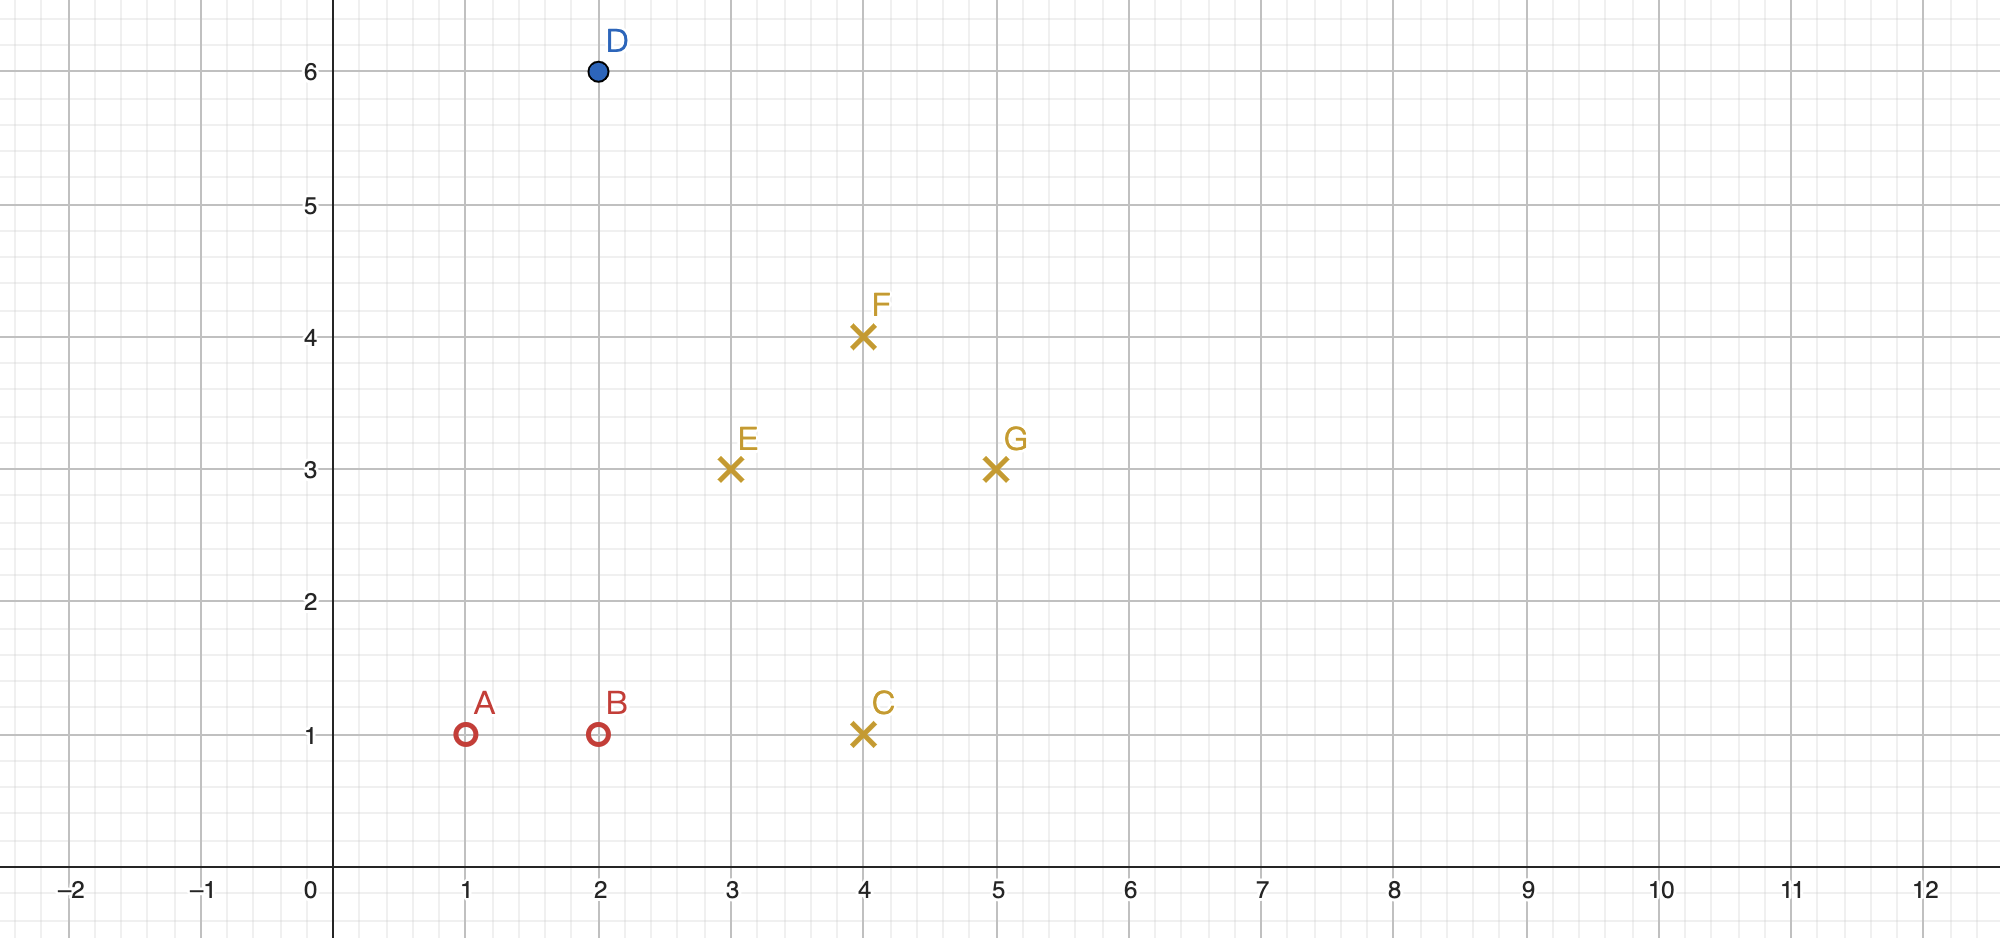

### Step6, link node D with $\color{red}{D(A,D)=5.099}$

| Distance | A | B | C | D | E | F | G |
| :-: | -: |  -: |  -: |  -: |  -: |  -: |  -: |
| A | 0 | - | - | - | - | - | - |
| B | 1 | 0 | - | - | - | - | - |
| C | 3 | 2 | 0 | - | - | - | - |
| D | 5.099 | 5 | 5.385 | 0 | - | - | - |
| E | 2.828 | 2.236 | 2.236 | 3.162 | 0 | - | - |
| F | 4.243 | 3.606 | 3 | 2.828 | 1.414 | 0 | - |
| G | 4.472 | 3.606 | 2.236 | 4.243 | 2 | 1.414 | 0 |

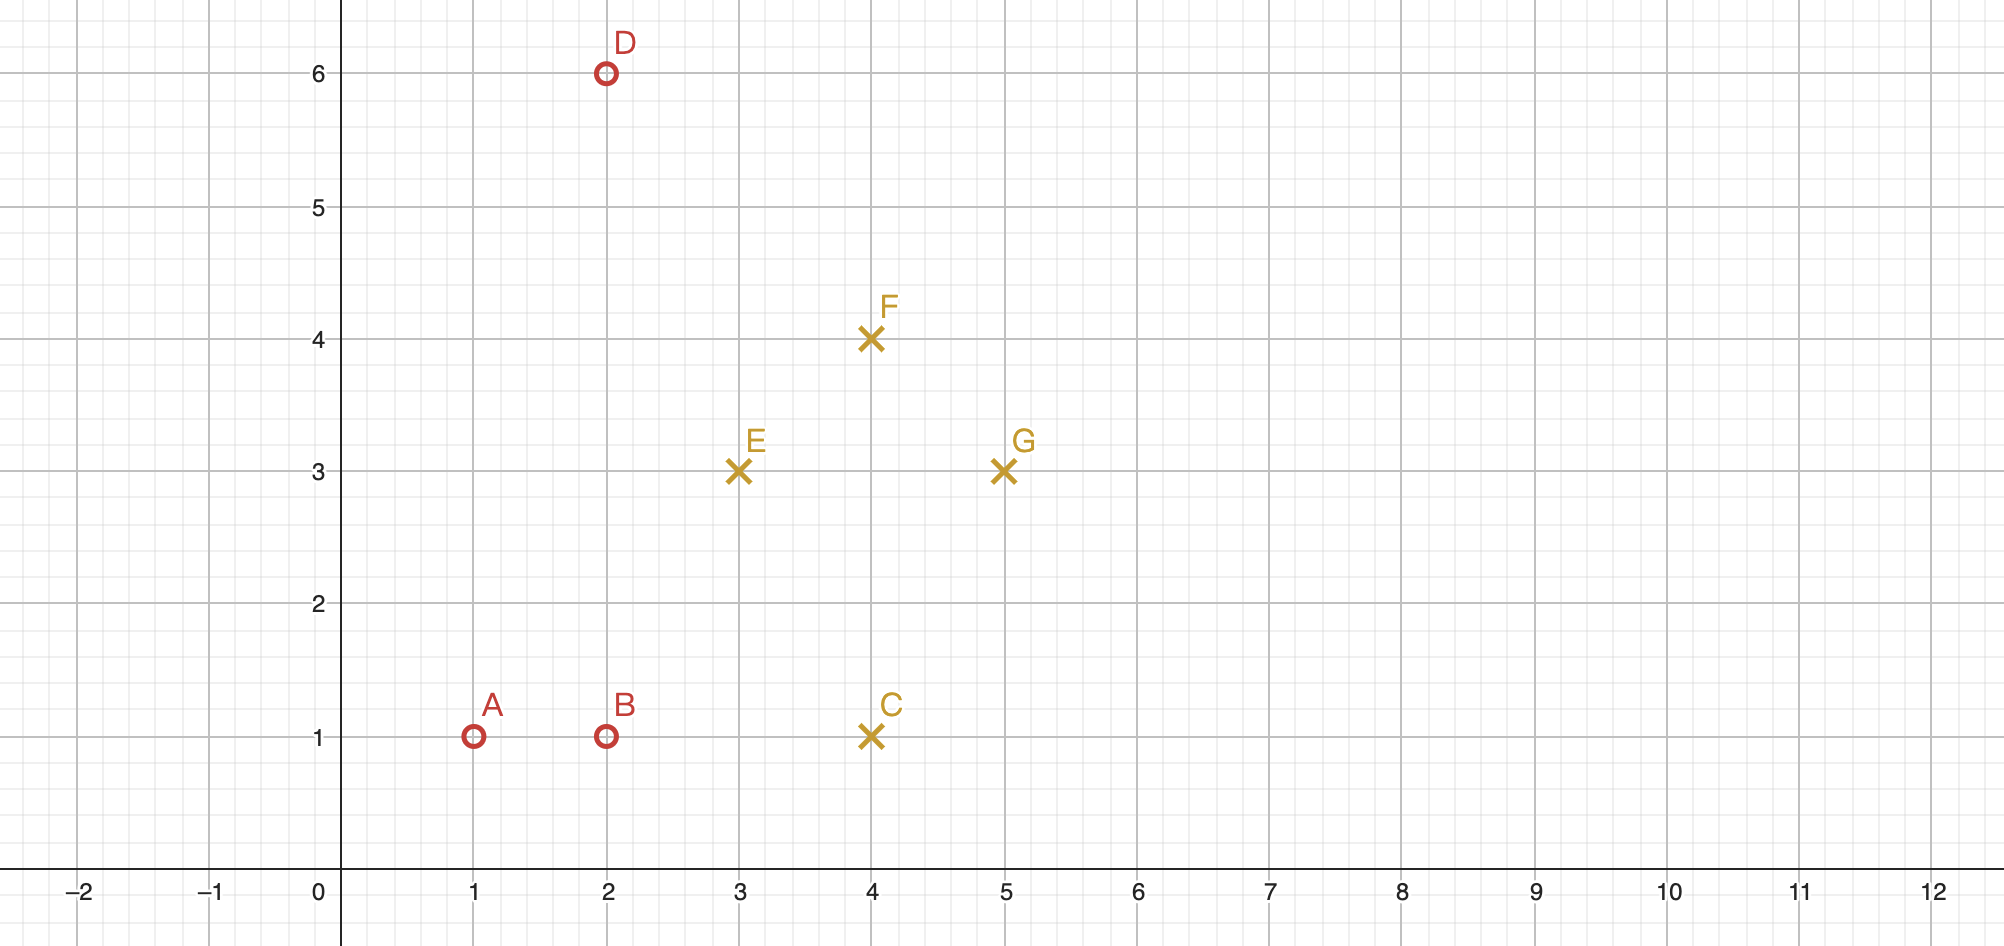

### Step7, merge two groups as one, with $\color{red}{D(C,D)=5.385}$

| Distance | A | B | C | D | E | F | G |
| :-: | -: |  -: |  -: |  -: |  -: |  -: |  -: |
| A | 0 | - | - | - | - | - | - |
| B | 1 | 0 | - | - | - | - | - |
| C | 3 | 2 | 0 | - | - | - | - |
| D | 5.099 | 5 | 5.385 | 0 | - | - | - |
| E | 2.828 | 2.236 | 2.236 | 3.162 | 0 | - | - |
| F | 4.243 | 3.606 | 3 | 2.828 | 1.414 | 0 | - |
| G | 4.472 | 3.606 | 2.236 | 4.243 | 2 | 1.414 | 0 |

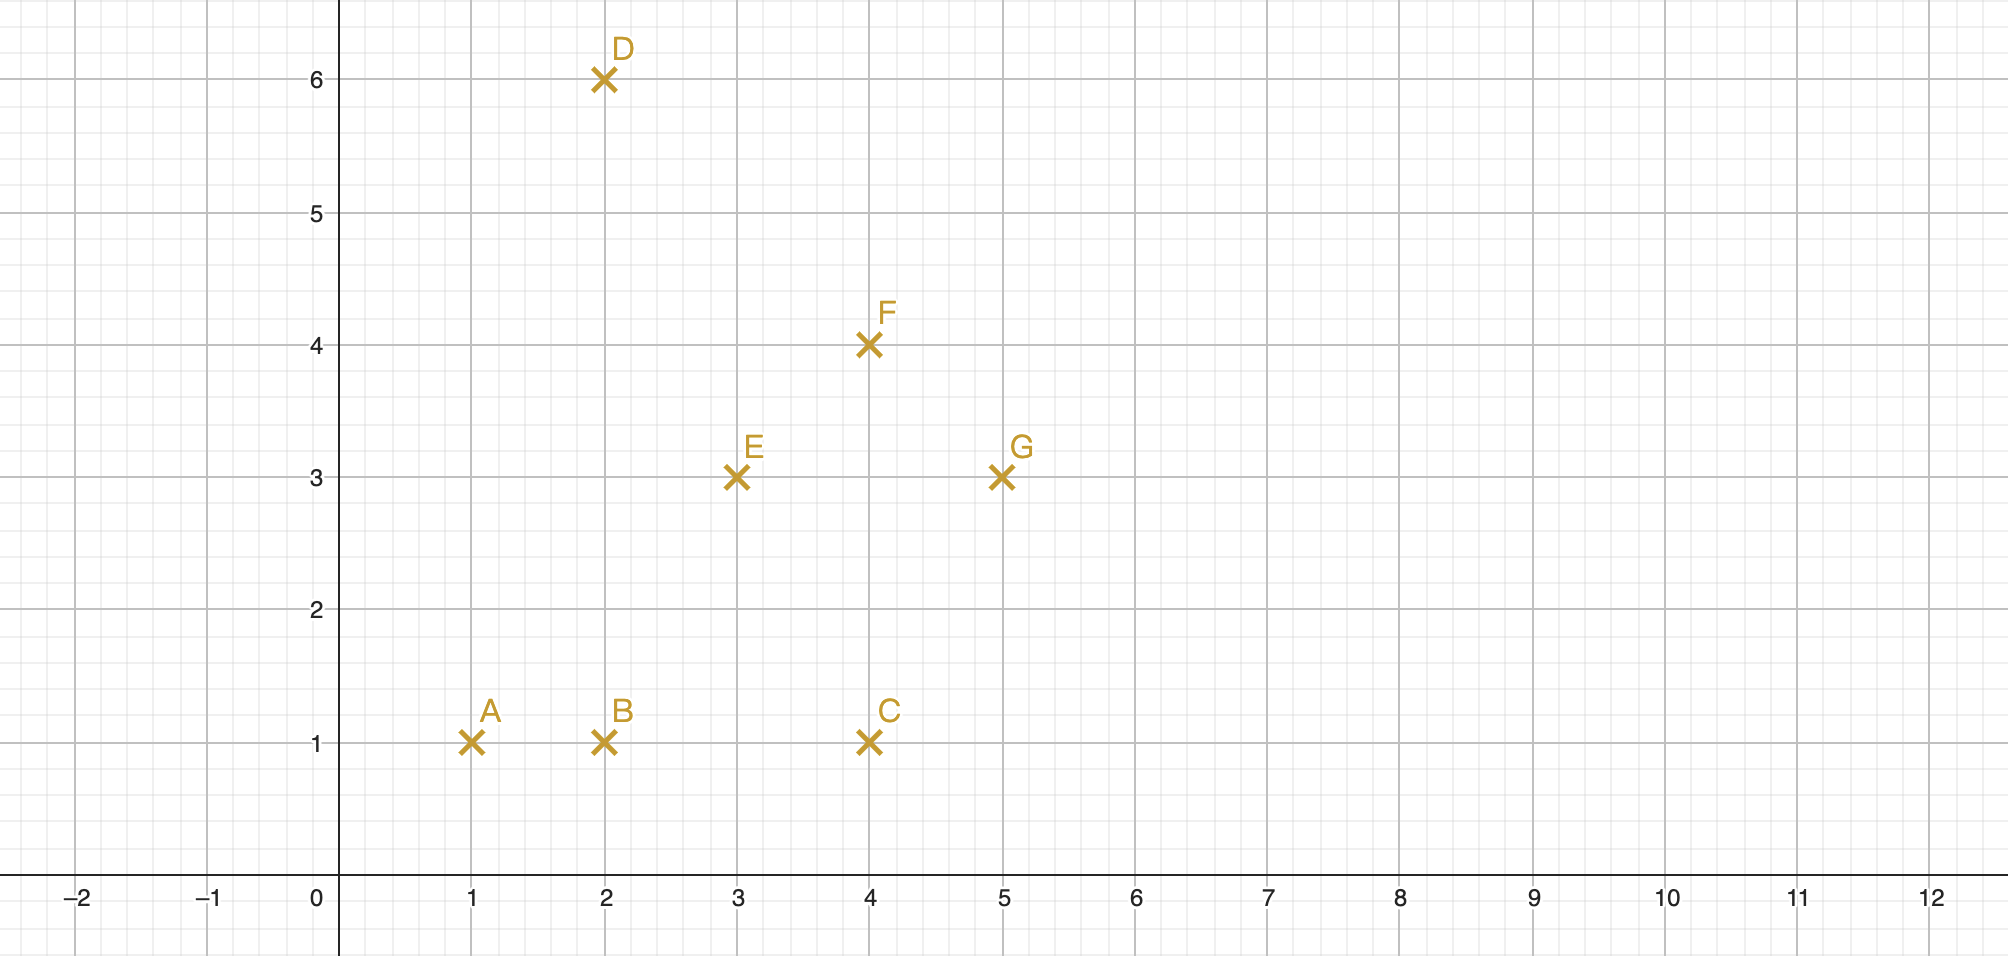

### 3.2. The dendrogram

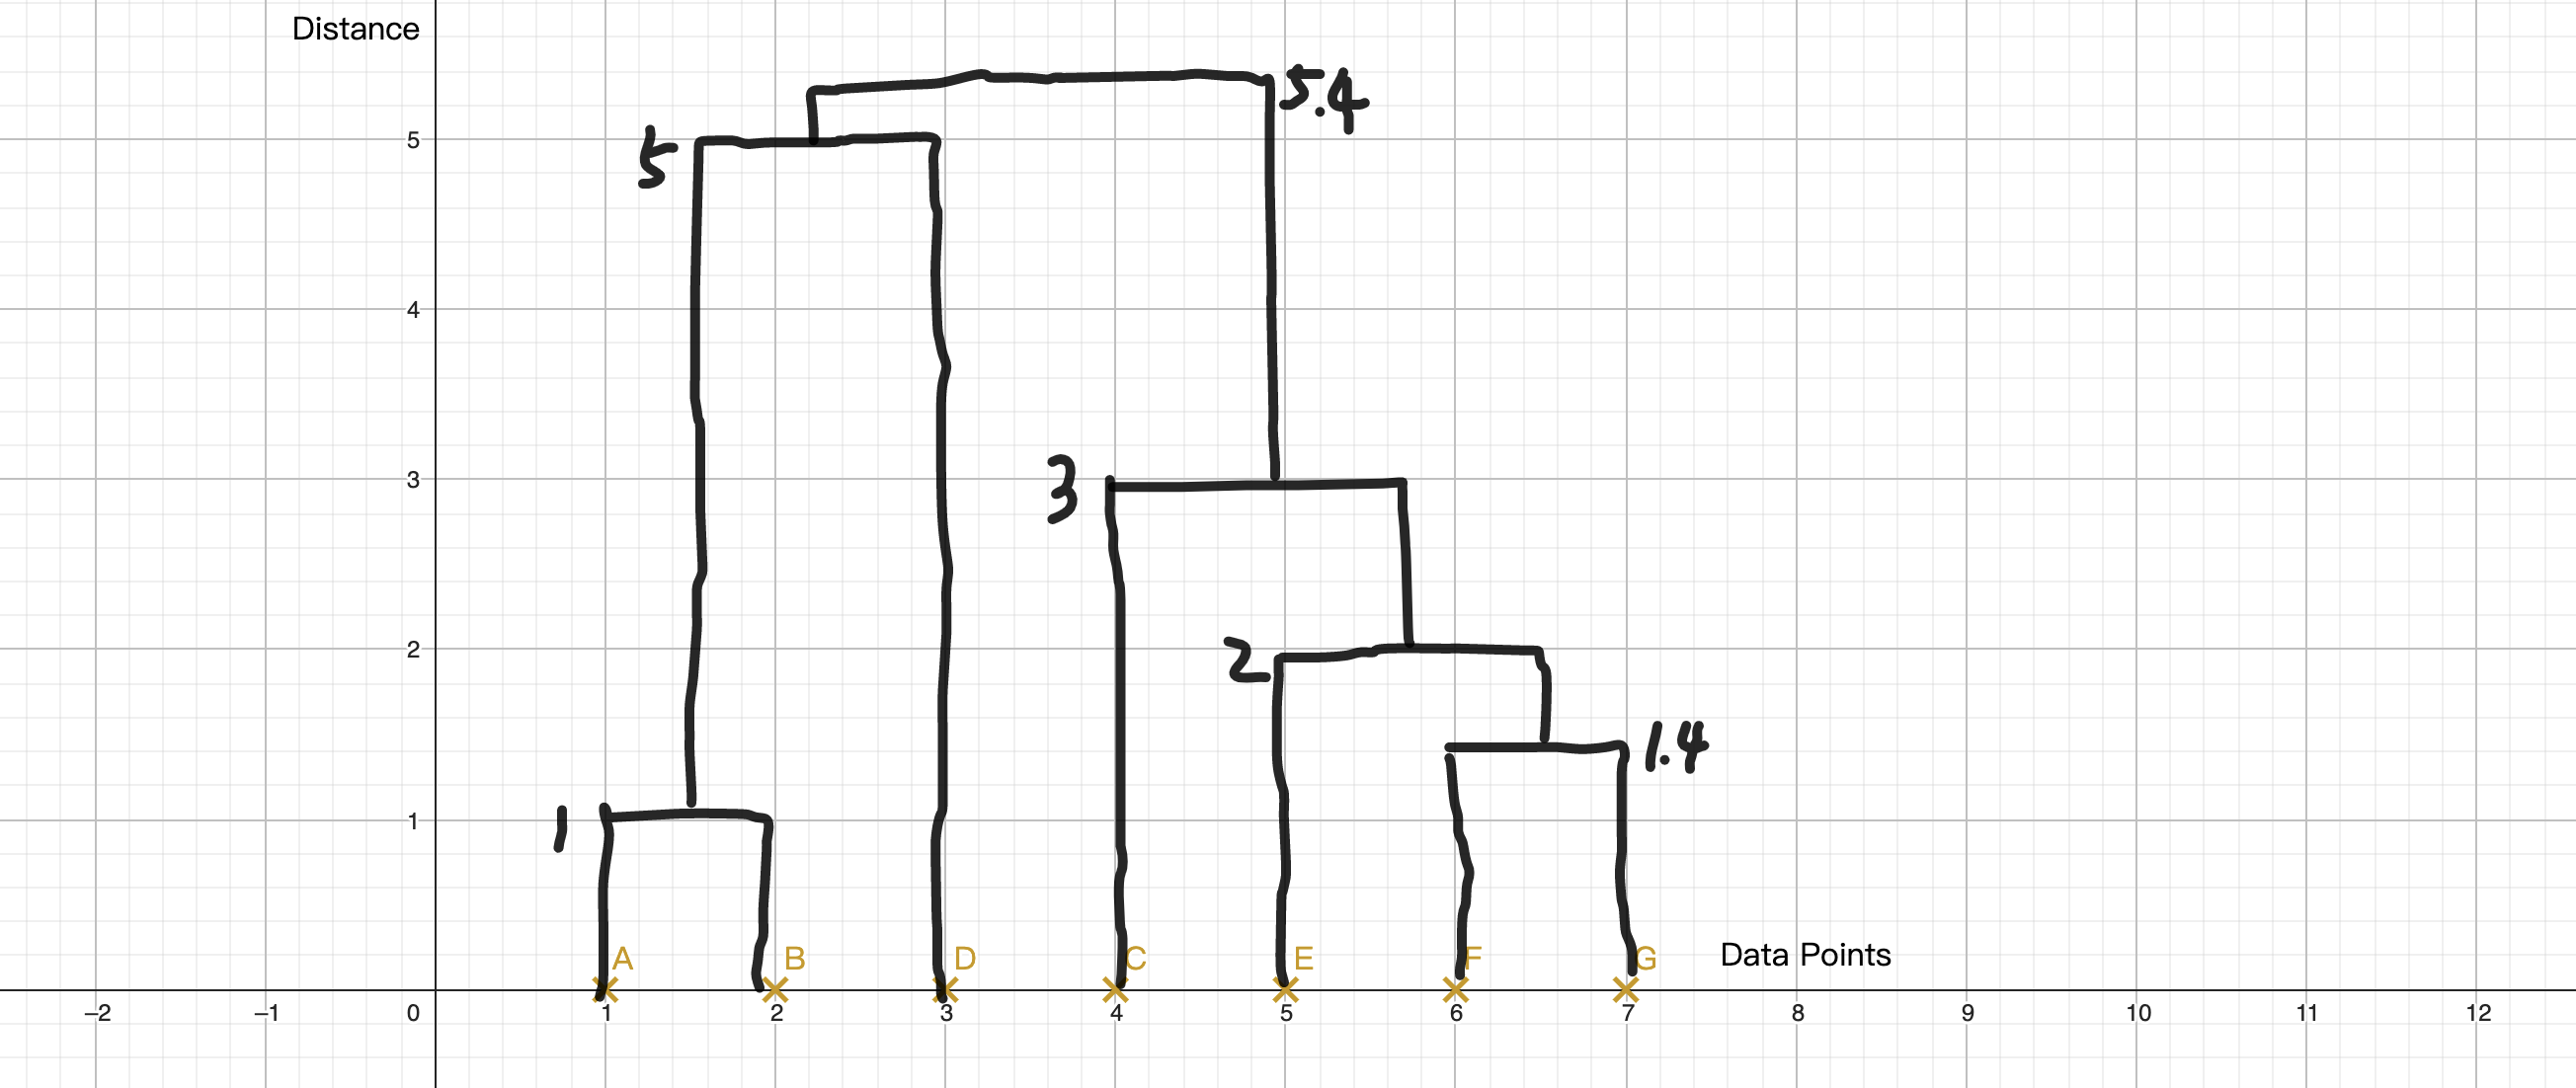

### 3.3. Can hierarchical clustering help in detecting outliers? Why/How? (5 points)

Generally, outliers are data points that are far away from the others. As the dendrogram shows, outliers are always be clustered at the terminal stage of processing. Therefore, applying stop-criteria depending on the dataset, the response of the algorithm will reject clustering most of the outliers from it.

### 3.4. In general, can we prune the dendrogram? How? (5 points)

Yes, we can prune the dendrogram where ever we want depending our need.

Basicly, The tree can be cut at various levels to produce different numbers of clusters: if you want k clusters, just cut the (k - 1) longest links. Besides, applying silhouette score is also a good idea to understand how well our clusters are.